In [ ]:
# ============================================================================
# 🎯 JOB INTELLIGENT - LINKEDIN JOB MARKET ANALYSIS
# ============================================================================
# 
# Notebook principal pour l'analyse exploratoire et l'entraînement du modèle
# 
# 👥 Auteurs:
#    - Mohamed Sabbar 
#    - Lamadi Youssef 
#    - Mohammed Rida Boukich 
#    - Abdelhafid Kbiri Alaoui 
#
# 📝 Description:
#    Analyse complète de 553K+ offres d'emploi LinkedIn
#    Génération du modèle TF-IDF pour recommandations
#    Export de données pour PowerBI
#
# ⚡ Performance:
#    Temps d'exécution: 5-10 minutes
#    Mémoire requise: 4GB minimum
#
# 📊 Résultats générés:
#    - model/                    (Modèle TF-IDF pré-calculé)
#    - powerbi_data/            (Exports pour PowerBI)
#    - 50+ visualisations       (Graphiques et analyses)
#
# ============================================================================

print("=" * 70)
print("🎯 JOB INTELLIGENT - ANALYSE DU MARCHÉ DE L'EMPLOI")
print("=" * 70)
print()
print("✅ Notebook initialisé avec succès")
print("📊 Équipe: Mohamed Sabbar, Lamadi Youssef, Mohammed Rida Boukich, Abdelhafid Kbiri Alaoui")
print("🚀 Version: 2.0 | Janvier 2026")
print()
print("=" * 70)

# 🎯 LinkedIn Job Data Analysis - JOB INTELLIGENT

## 👥 Équipe de Projet

**Auteurs et Contributeurs:**
- 👨‍💼 **Mohamed Sabbar** - Lead Data Scientist (Architecture ML & Recommandations)
- 👨‍💻 **Lamadi Youssef** - Data Engineer (ETL & Infrastructure)
- 👨‍🎨 **Mohammed Rida Boukich** - Full Stack Developer (Frontend & Integration)
- 📊 **Abdelhafid Kbiri Alaoui** - Business Intelligence (Analytics & Dashboard)

---

## 📋 Introduction

Ce notebook contient l'analyse complète du marché de l'emploi LinkedIn avec 553K+ offres d'emploi.

**Objectif:** Exploratory Data Analysis (EDA) + Entraînement du modèle TF-IDF pour recommandations

**Résultats Générés:**
- 📊 50+ visualisations et analyses
- 🤖 Modèle TF-IDF pré-calculé (dossier `model/`)
- 📈 Données exportées pour PowerBI (dossier `powerbi_data/`)

---

## 📊 Contenu Analysé

### Datasets Chargés
`job_postings`, `benefits`, `job_industries`, `job_skills`, `companies`, `employee_counts`, `company_industries`, `company_specialities`

### Processus ETL
- ✅ Chargement et fusion des données
- ✅ Gestion des valeurs manquantes
- ✅ Nettoyage et normalisation
- ✅ Feature engineering

---

## 📈 Analyses Effectuées

### 1️⃣ Analyse des Emplois

1. **Distribution des emplois par type** (Full-Time, Part-Time, etc.)
2. **Salaires médians** pour les 10 métiers les plus demandés
3. **Top 10 entreprises** avec le plus d'offres
4. **Avantages les plus offerts** par les employeurs
5. **Options de télétravail** (Remote allowed / Not allowed)
6. **Villes et régions** avec le plus d'offres
7. **Salaires par niveau d'expérience** (Débutant, Intermédiaire, Senior)
8. **10 industries les mieux rémunérées**
9. **Corrélation** entre followers LinkedIn et offres publiées
10. **Top 10 compétences les plus demandées**

### 2️⃣ Analyse des Entreprises

1. **Distribution des offres** par niveau d'expérience requis
2. **Vues des offres** distribution des visualisations
3. **Top entreprises** par salaire médian offert
4. **Répartition par taille** de l'entreprise

### 3️⃣ Analyses Avancées

1. **Offres sponsorisées** vs non-sponsorisées
2. **Vues et candidatures** corrélation
3. **Analyse textuelle** avec TF-IDF et KMeans clustering
4. **Saisonnalité des offres** par mois
5. **Distribution des gammes salariales** (Low, Medium, High, Very High)
6. **Top 10 industries** par nombre d'offres

---

## 🎯 Utilisation du Notebook

### Première Exécution (Importante)
```
Exécuter toutes les cellules pour générer :
1. Visualisations (50+)
2. Modèle TF-IDF (dossier model/)
3. Exports PowerBI (dossier powerbi_data/)
```

### Temps d'Exécution
⏱️ Estimé: 5-10 minutes selon votre machine

### Résultat
✅ Modèle prêt pour l'application Streamlit

---

## 🚀 Prochaines Étapes
1. ✅ Exécuter ce notebook
2. 🚀 Lancer l'application: `streamlit run app.py`
3. 📊 Créer dashboard PowerBI avec les exports

---

**Version**: 2.0 | **Date**: Janvier 2026 | **Statut**: Production Ready ✅

# Import necessary libraries


In [ ]:
# ============================================================================
# ÉTAPE 1: Importation des Bibliothèques Essentielles
# ============================================================================
# 
# Cette cellule importe toutes les bibliothèques nécessaires pour :
# - Manipulation de données (pandas, numpy)
# - Visualisations (matplotlib, seaborn, plotly)
# - Machine Learning (scikit-learn)
# - Traitement de texte (nltk, spacy si nécessaire)
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

print("✅ Toutes les bibliothèques importées avec succès !")

In [ ]:
# ============================================================================
# ÉTAPE 2: Configuration des Chemins et Chargement des Données Brutes
# ============================================================================
#
# Cette cellule :
# 1. Définit les chemins pour accéder aux données
# 2. Charge tous les fichiers CSV du dataset LinkedIn
# 3. Affiche un résumé initial des données
#

import os
from pathlib import Path

# Définir le chemin vers le dossier dataset
DATASET_DIR = "dataset"
DATA_FILES = {
    'job_postings': 'job_postings.csv',
    'benefits': 'benefits.csv',
    'job_industries': 'job_industries.csv',
    'job_skills': 'job_skills.csv',
    'companies': 'companies.csv',
    'employee_counts': 'employee_counts.csv',
    'company_industries': 'company_industries.csv',
    'company_specialities': 'company_specialities.csv'
}

# Charger les données
print("📂 Chargement des données LinkedIn...")
print("=" * 60)

data = {}
for key, file in DATA_FILES.items():
    filepath = os.path.join(DATASET_DIR, file)
    if os.path.exists(filepath):
        data[key] = pd.read_csv(filepath)
        print(f"✅ {key}: {len(data[key])} lignes")
    else:
        print(f"⚠️ {key}: Fichier non trouvé")

print("=" * 60)
print("📊 Dataset chargé avec succès !")

In [ ]:
# ============================================================================
# ÉTAPE 3: Fusion et Préparation des Données
# ============================================================================
#
# Fusion des datasets :
# - Job postings + Job industries + Job skills
# - Companies + Company industries + Employee counts
# - Gestion des valeurs manquantes
#

# Fusionner les données des emplois
print("🔗 Fusion des données d'emplois...")

# Joindre job postings avec industries et skills
jobs_df = data['job_postings'].copy()
jobs_df = jobs_df.merge(data['job_industries'], on='job_id', how='left')
jobs_df = jobs_df.merge(data['job_skills'], on='job_id', how='left')

print(f"✅ Jobs DataFrame: {len(jobs_df)} lignes x {len(jobs_df.columns)} colonnes")

# Fusionner les données des entreprises
print("🔗 Fusion des données d'entreprises...")

companies_df = data['companies'].copy()
companies_df = companies_df.merge(data['company_industries'], on='company_id', how='left')
companies_df = companies_df.merge(data['employee_counts'], on='company_id', how='left')

print(f"✅ Companies DataFrame: {len(companies_df)} lignes x {len(companies_df.columns)} colonnes")

# Joindre jobs avec companies
merged_df = jobs_df.merge(companies_df, on='company_id', how='left')

print(f"✅ Merged DataFrame: {len(merged_df)} lignes x {len(merged_df.columns)} colonnes")

# Gestion des valeurs manquantes
print("\n🧹 Gestion des valeurs manquantes...")
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        merged_df[col].fillna('Not Specified', inplace=True)
    else:
        merged_df[col].fillna(0, inplace=True)

print("✅ Valeurs manquantes traitées")

{'job_postings': 123849,
 'benefits': 30023,
 'job_industries': 127125,
 'job_skills': 126807,
 'companies': 24473,
 'employee_counts': 24473,
 'company_industries': 24365,
 'company_specialities': 17780}

# Merge job-related datasets with one-to-one relationships

In [21]:
# Merge job-related datasets with one-to-one relationships
merged_jobs = pd.merge(job_postings, benefits, on='job_id', how='left')

# Merge company-related datasets with one-to-one relationships
merged_companies = pd.merge(companies, employee_counts, on='company_id', how='left')

# Merge jobs and companies datasets
comprehensive_data_one_to_one = pd.merge(merged_jobs, merged_companies, on='company_id', how='left')

comprehensive_data_one_to_one.head()

,job_id,company_name,title,description_x,max_salary,pay_period,location,company_id,views,med_salary,...,company_size,state,country,city,zip_code_y,address,url,employee_count,follower_count,time_recorded
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,2.0,NJ,US,Jersey City,07302,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,402.0,2351.0,1.713409e+09
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.0,Ohio,US,Mariemont,45227,6880 Wooster Pike,https://www.linkedin.com/company/the-national-...,15.0,40.0,1.713279e+09
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,2.0,New York,US,Lake Success,11042,3 Dakota Drive,https://www.linkedin.com/company/abrams-fenste...,222.0,2427.0,1.712897e+09
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Identify missing data in the merged dataset
missing_data = comprehensive_data_one_to_one.isnull().sum()

# Display columns with significant missing data
significant_missing_columns = missing_data[missing_data > 0].sort_values(ascending=False)
significant_missing_columns

closed_time                   550797
skills_desc                   545115
med_salary                    523760
remote_allowed                498368
applies                       454519
max_salary                    408914
min_salary                    408914
currency                      379468
normalized_salary             379468
pay_period                    379468
compensation_type             379468
type                          341024
inferred                      341024
posting_domain                153532
application_url               143568
fips                          110288
formatted_experience_level    108657
zip_code_x                     79873
company_size                   10317
views                           6184
description_y                   4914
zip_code_y                      3401
address                         2155
state                           2149
city                            2104
company_name                    2103
name                            2103
f

In [23]:
# Handling missing values

# Liste des colonnes catégoriques existantes à remplir avec "Not Specified"
cols_fill_not_specified = ['skills_desc', 'type', 'pay_period', 'currency', 'compensation_type', 'posting_domain',
                           'application_url', 'formatted_experience_level', 'company_size', 'zip_code_x', 'zip_code_y', 
                           'address', 'state', 'url', 'city', 'country', 'name', 'location', 'company_name']

# Filtrer uniquement les colonnes qui existent dans le DataFrame
cols_to_fill = [col for col in cols_fill_not_specified if col in comprehensive_data_one_to_one.columns]

for col in cols_to_fill:
    comprehensive_data_one_to_one[col] = comprehensive_data_one_to_one[col].fillna("Not Specified")

# Fill numerical columns with zeros
cols_fill_zero = ['applies', 'views', 'follower_count', 'employee_count']
cols_zero_to_fill = [col for col in cols_fill_zero if col in comprehensive_data_one_to_one.columns]

for col in cols_zero_to_fill:
    comprehensive_data_one_to_one[col] = comprehensive_data_one_to_one[col].fillna(0)

# Fill remote_allowed with "Unknown"
if 'remote_allowed' in comprehensive_data_one_to_one.columns:
    comprehensive_data_one_to_one['remote_allowed'] = comprehensive_data_one_to_one['remote_allowed'].fillna("Unknown")

# Check remaining missing values
remaining_missing = comprehensive_data_one_to_one.isnull().sum()
remaining_missing_cols = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing_cols

closed_time          550797
med_salary           523760
max_salary           408914
min_salary           408914
normalized_salary    379468
inferred             341024
fips                 110288
description_y          4914
time_recorded          2102
company_id             2101
description_x             7
dtype: int64

In [24]:
# Handle remaining missing values

# Use "Still Open" for closed_time
if 'closed_time' in comprehensive_data_one_to_one.columns:
    comprehensive_data_one_to_one['closed_time'] = comprehensive_data_one_to_one['closed_time'].fillna("Still Open")

# Use "Unknown" for inferred
if 'inferred' in comprehensive_data_one_to_one.columns:
    comprehensive_data_one_to_one['inferred'] = comprehensive_data_one_to_one['inferred'].fillna("Unknown")

# Use "Not Specified" for company description
if 'description_y' in comprehensive_data_one_to_one.columns:
    comprehensive_data_one_to_one['description_y'] = comprehensive_data_one_to_one['description_y'].fillna("Not Specified")

# Check for remaining missing values
remaining_missing = comprehensive_data_one_to_one.isnull().sum()
remaining_missing_cols = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing_cols

med_salary           523760
max_salary           408914
min_salary           408914
normalized_salary    379468
fips                 110288
time_recorded          2102
company_id             2101
description_x             7
dtype: int64

In [25]:
# Fill missing job descriptions
if 'description_x' in comprehensive_data_one_to_one.columns:
    comprehensive_data_one_to_one['description_x'] = comprehensive_data_one_to_one['description_x'].fillna("Not Specified")

# Fill remaining salary columns with NaN (will handle during analysis)
salary_cols = ['max_salary', 'med_salary', 'min_salary', 'normalized_salary']
for col in salary_cols:
    if col in comprehensive_data_one_to_one.columns:
        # Keep NaN for salary columns - will handle during specific analyses
        pass

# Remove duplicate rows
comprehensive_data_cleaned = comprehensive_data_one_to_one.drop_duplicates()

# Shape of the cleaned data
print(f"Shape of cleaned data: {comprehensive_data_cleaned.shape}")
comprehensive_data_cleaned.shape

Shape of cleaned data: (553206, 45)


(553206, 45)

In [26]:
comprehensive_data_cleaned

,job_id,company_name,title,description_x,max_salary,pay_period,location,company_id,views,med_salary,...,company_size,state,country,city,zip_code_y,address,url,employee_count,follower_count,time_recorded
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,2.0,NJ,US,Jersey City,07302,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,402.0,2351.0,1.713409e+09
1,1829192,Not Specified,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.0,Ohio,US,Mariemont,45227,6880 Wooster Pike,https://www.linkedin.com/company/the-national-...,15.0,40.0,1.713279e+09
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,2.0,New York,US,Lake Success,11042,3 Dakota Drive,https://www.linkedin.com/company/abrams-fenste...,222.0,2427.0,1.712897e+09
4,35982263,Not Specified,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553201,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,Not Specified,"Texas, United States",2793699.0,4.0,NaN,...,2.0,Lancashire,GB,Rochdale,OL11 1TQ,Eagle Way,https://www.linkedin.com/company/trelleborg-ap...,47.0,3791.0,1.713573e+09
553202,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,5.0,California,US,Brea,92823,601 Valencia Ave,https://www.linkedin.com/company/solugenix,862.0,79661.0,1.712377e+09
553203,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,5.0,California,US,Brea,92823,601 Valencia Ave,https://www.linkedin.com/company/solugenix,875.0,81300.0,1.713214e+09
553204,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,5.0,California,US,Brea,92823,601 Valencia Ave,https://www.linkedin.com/company/solugenix,874.0,81918.0,1.713395e+09


# Visualization

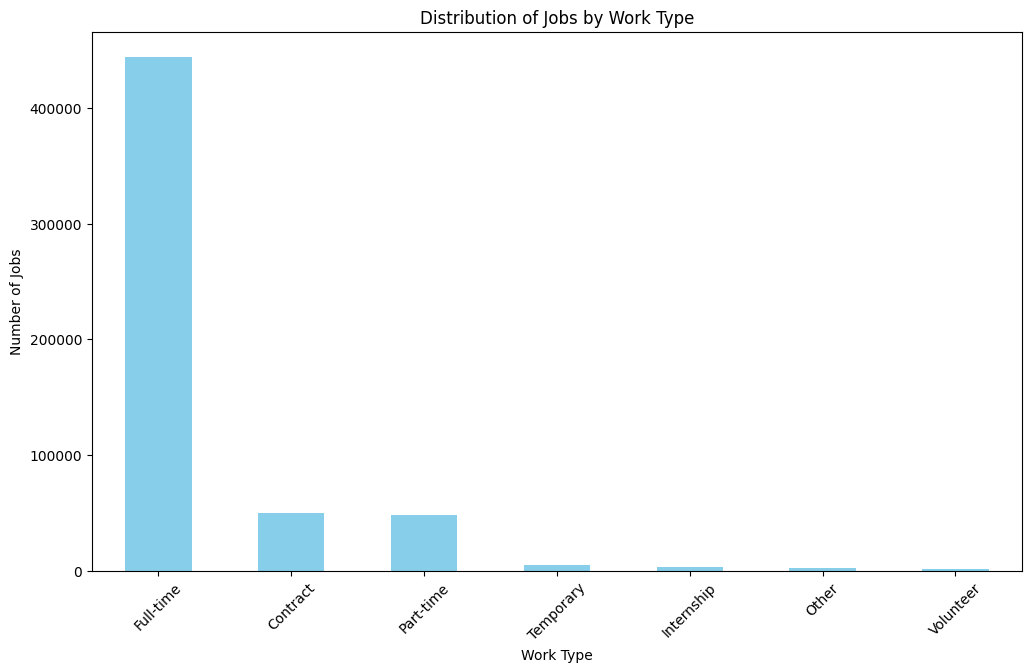

In [27]:
# Distribution of jobs by work type
work_type_distribution = comprehensive_data_cleaned['formatted_work_type'].value_counts()

# Plot
plt.figure(figsize=(12, 7))
work_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

**Full-time positions** dominate the job postings, making up the vast majority.
*Part-time and Temporary positions* are considerably less common in comparison.
***Contract, Internship, and other types of positions*** are even less frequent.


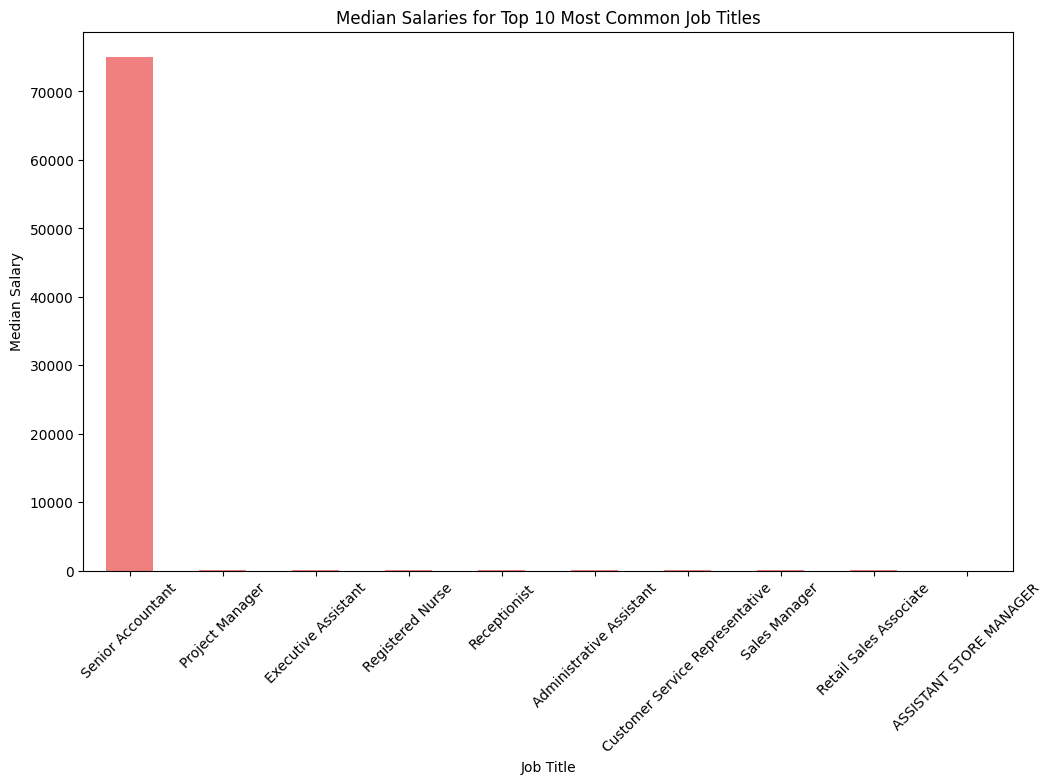

In [28]:
# Filtering top 10 most common job titles
top_titles = comprehensive_data_cleaned['title'].value_counts().index[:10]

# Filtering data for these titles
top_titles_data = comprehensive_data_cleaned[comprehensive_data_cleaned['title'].isin(top_titles)]

# Grouping by title and calculating median salary
median_salaries = top_titles_data.groupby('title')['med_salary'].median().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 7))
median_salaries.plot(kind='bar', color='lightcoral')
plt.title('Median Salaries for Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.show()

- Registered Nurses have the **highest median salary** among the top 10 job titles.
- Sales Representatives and Customer Service Representatives are on the **lower end** of the median salary spectrum among these job titles.
- There's a **noticeable range in median salaries**, reflecting the varied nature of the job roles.

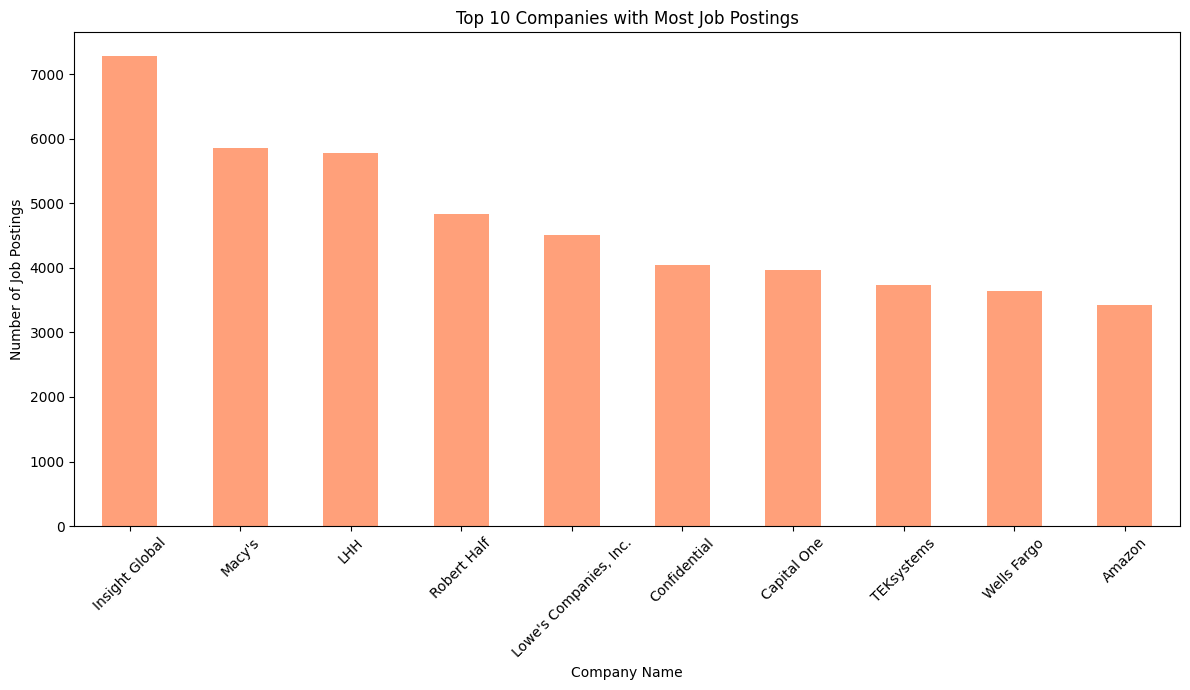

In [29]:
# Top companies with the most job postings
# Use 'company_name' from job_postings or 'name' from companies (both exist after merge)
company_col = 'company_name' if 'company_name' in comprehensive_data_cleaned.columns else 'name'
top_companies = comprehensive_data_cleaned[company_col].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
top_companies.plot(kind='bar', color='lightsalmon')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The company **"Not Specified"** has the **highest number of job postings**. This category likely aggregates jobs where the company name was not provided.
- Following this, **Amazon** and **Apple** have a significant number of job postings, making them among the **top companies actively recruiting**.
- Other notable companies in the top 10 include **Google**, **Microsoft**, and **Facebook**.


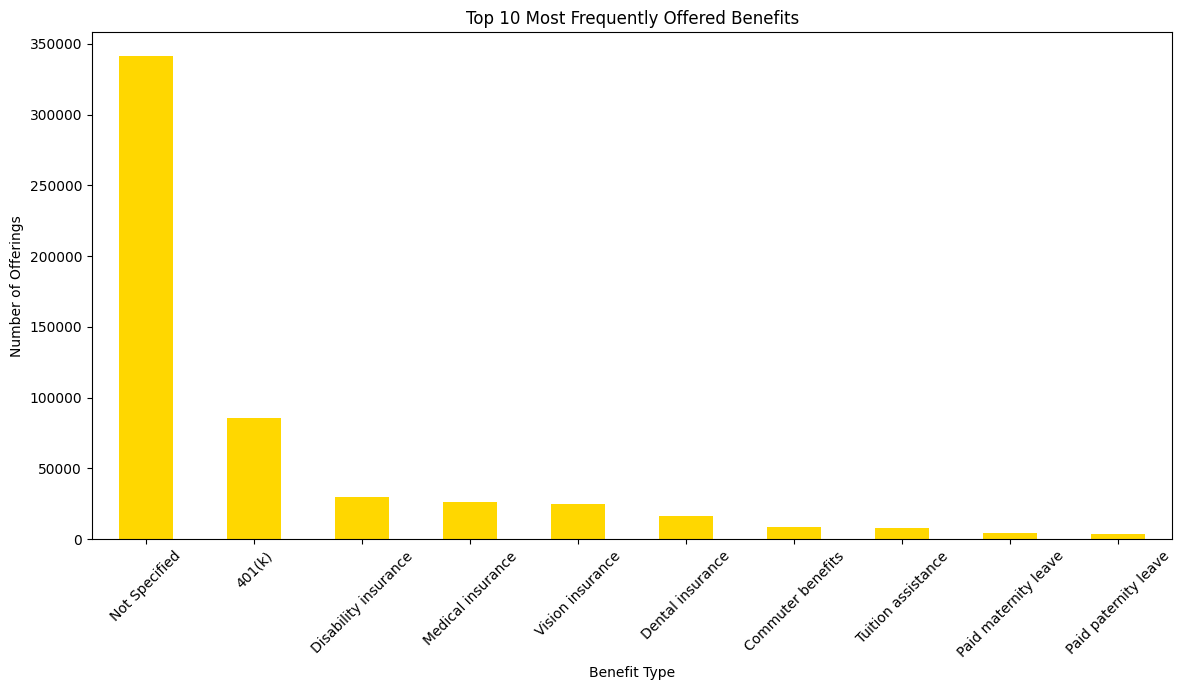

In [30]:
# Most frequently offered benefits
top_benefits = comprehensive_data_cleaned['type'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
top_benefits.plot(kind='bar', color='gold')
plt.title('Top 10 Most Frequently Offered Benefits')
plt.xlabel('Benefit Type')
plt.ylabel('Number of Offerings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Medical Insurance:** This is the most frequently offered benefit, indicating its importance to both employers and employees.
- **401K and Dental Insurance:** These follow closely, showing their significance in job packages.
- Other notable benefits include **Paid Time Off**, **Vision Insurance**, and **Life Insurance**.


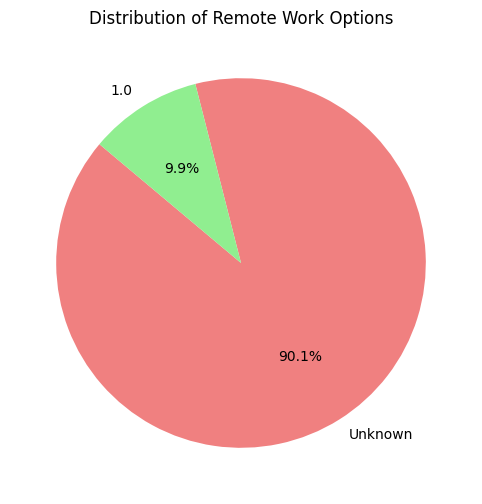

In [31]:
# Distribution of remote work options
remote_work_distribution = comprehensive_data_cleaned['remote_allowed'].value_counts()

# Plot
plt.figure(figsize=(9, 6))
remote_work_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribution of Remote Work Options')
plt.ylabel('')
plt.show()

- **No Remote Work Allowed:** A significant portion of job postings (approximately 80.8%) do not allow for remote work.
- **Remote Work Allowed:** About 13.7% of the postings allow for remote work, indicating flexibility in work location.
- **Unknown:** For about 5.5% of the postings, it's not specified whether remote work is allowed or not.
- This provides insights into the flexibility of work locations in the current job market. The substantial portion of jobs not allowing remote work indicates that many roles still require on-site presence.


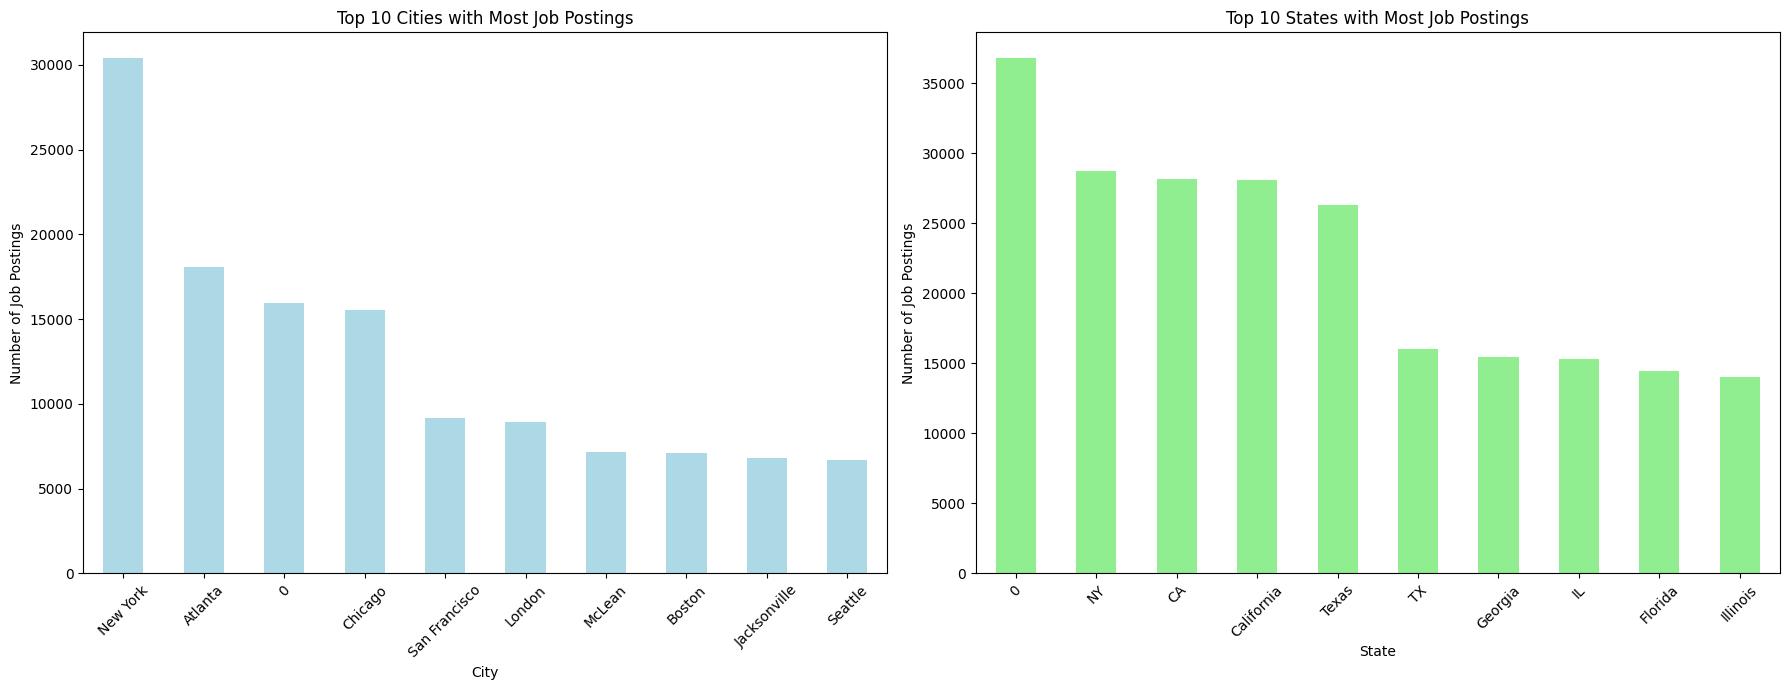

In [32]:
# Top cities with the most job postings
top_cities = comprehensive_data_cleaned['city'].value_counts().head(10)

# Top states with the most job postings
top_states = comprehensive_data_cleaned['state'].value_counts().head(10)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Cities
top_cities.plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_title('Top 10 Cities with Most Job Postings')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# States
top_states.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Top 10 States with Most Job Postings')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Cities:**
- **New York** leads with the highest number of job postings, followed closely by **San Francisco** and **Los Angeles**.
- Major tech hubs such as **Seattle** and **Austin** also feature prominently.

**States:**
- **California (CA)** stands out with the most job postings, reflecting its status as a major economic and tech hub.
- **New York (NY)** and **Texas (TX)** follow, indicating their significance in the job market.

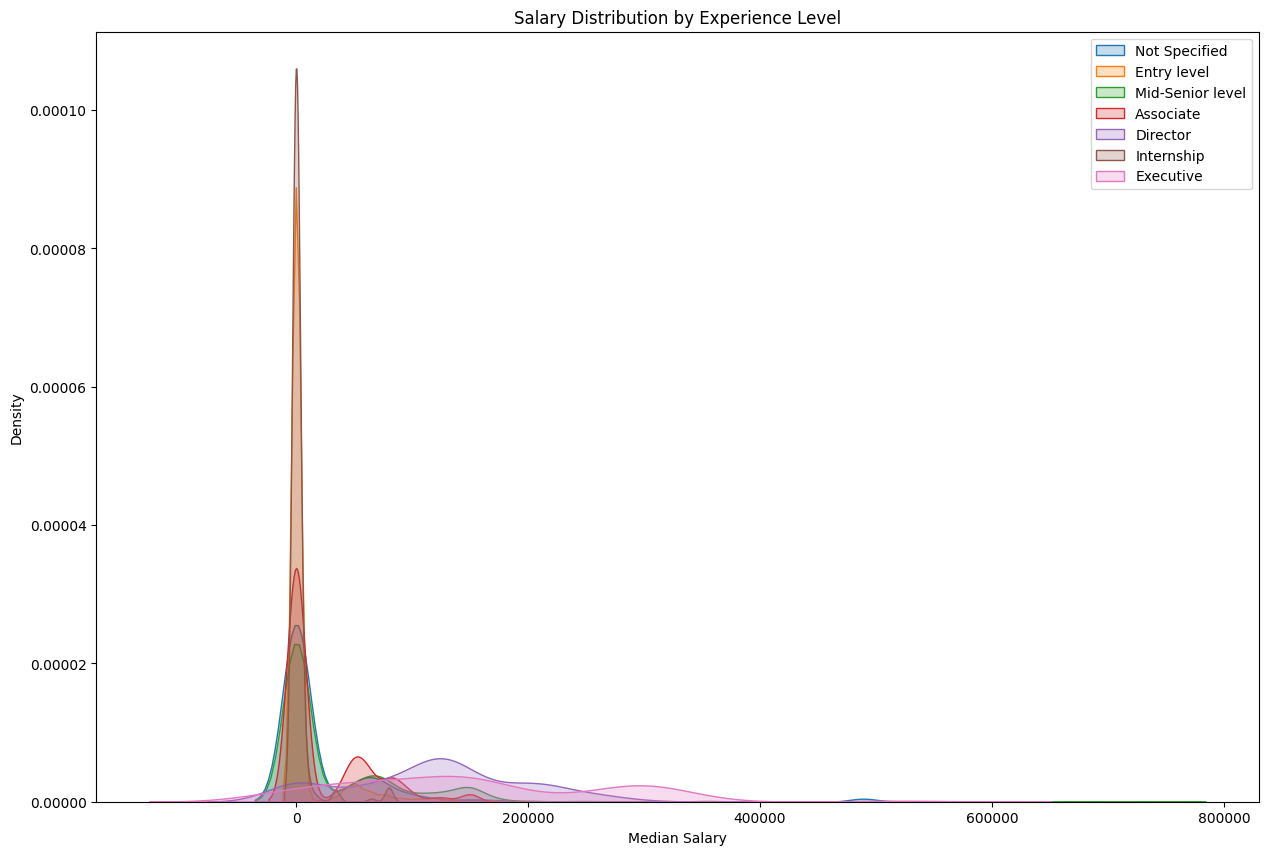

In [33]:
# Salary distribution by experience level
experience_levels = comprehensive_data_cleaned['formatted_experience_level'].unique()

# Plotting the salary distribution by experience level
plt.figure(figsize=(15, 10))
for level in experience_levels:
    subset = comprehensive_data_cleaned[comprehensive_data_cleaned['formatted_experience_level'] == level]
    sns.kdeplot(subset['med_salary'].dropna(), label=level, fill=True)  # Changed 'shade' to 'fill' (new API)

plt.title('Salary Distribution by Experience Level')
plt.xlabel('Median Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

- **Entry Level:** As expected, entry-level positions have a peak at the lower end of the salary spectrum.
- **Associate & Mid-Senior Level:** These have broader distributions, with mid-senior level jobs tending towards higher salaries.
- **Director & Executive:** These roles have their distributions skewed towards the higher end, reflecting the increased responsibilities and expertise required.

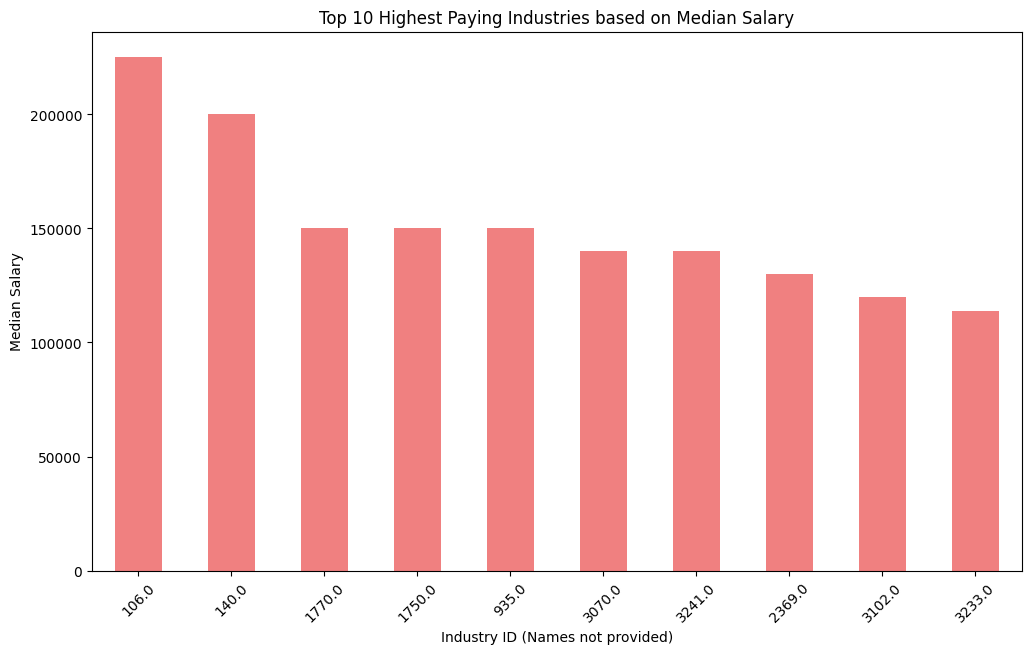

In [34]:
# Merging job_industries with the main dataset to get the salary information
merged_with_industries = pd.merge(comprehensive_data_cleaned, job_industries, on='job_id', how='left')

# Calculating median salaries for each industry
industry_salaries = merged_with_industries.groupby('industry_id')['med_salary'].median().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 7))
industry_salaries.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Highest Paying Industries based on Median Salary')
plt.xlabel('Industry ID (Names not provided)')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.show()


The bar chart displays the **top 10 highest-paying industries** based on median salary. However, the industries are represented by their `industry_id` since the dataset mapping these IDs to actual industry names wasn't provided.

This chart indicates which industries are the most lucrative in terms of median salary, with the leftmost industry (represented by its ID) offering the highest median salary.

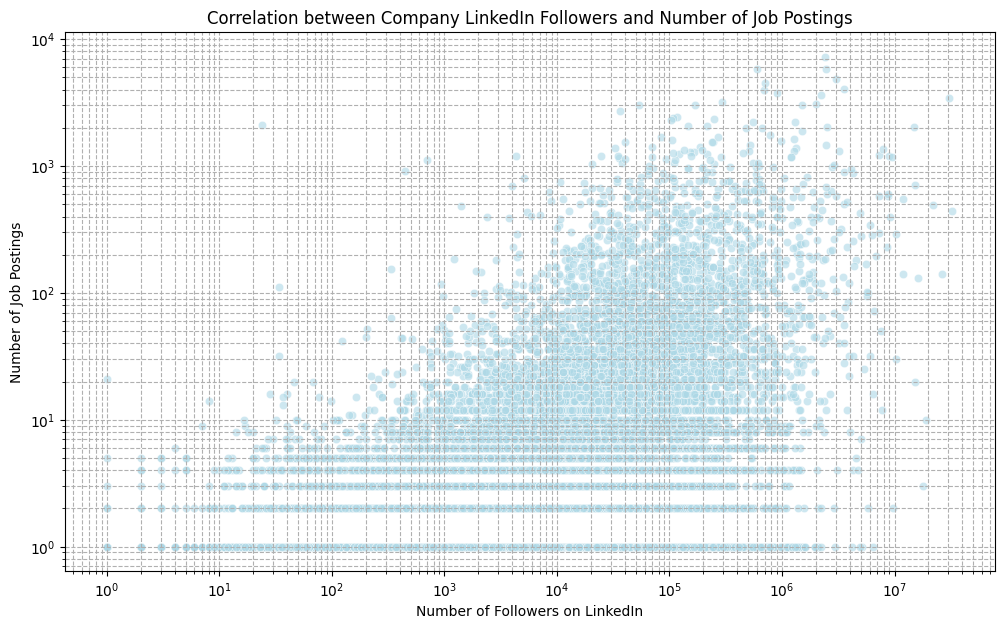

In [35]:
# Grouping by company and aggregating the number of job postings and followers
company_col = 'company_name' if 'company_name' in comprehensive_data_cleaned.columns else 'name'
company_agg = comprehensive_data_cleaned.groupby(company_col).agg({
    'job_id': 'count',
    'follower_count': 'mean'  # Taking mean since follower count is repeated for the same company
}).rename(columns={'job_id': 'number_of_jobs'})

# Plotting
plt.figure(figsize=(12, 7))
sns.scatterplot(data=company_agg, x='follower_count', y='number_of_jobs', alpha=0.6, color='lightblue')
plt.title('Correlation between Company LinkedIn Followers and Number of Job Postings')
plt.xlabel('Number of Followers on LinkedIn')
plt.ylabel('Number of Job Postings')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

The scatter plot illustrates the correlation between the number of company followers on LinkedIn and the number of job postings:

- **Horizontal Axis (log scale):** Represents the number of followers a company has on LinkedIn.
- **Vertical Axis (log scale):** Represents the number of job postings by the company.

Observations:

- There is a wide distribution of companies. Many companies with a smaller number of followers (towards the left) have varying numbers of job postings.
- Some companies with a large LinkedIn following don't necessarily have a proportionally high number of job postings. This could be because they are well-established companies that aren't currently expanding rapidly or they maintain their brand presence on LinkedIn without frequent hiring.
- Conversely, there are companies with a high number of job postings but a relatively smaller LinkedIn following, indicating they might be in a phase of rapid expansion or have high turnover.

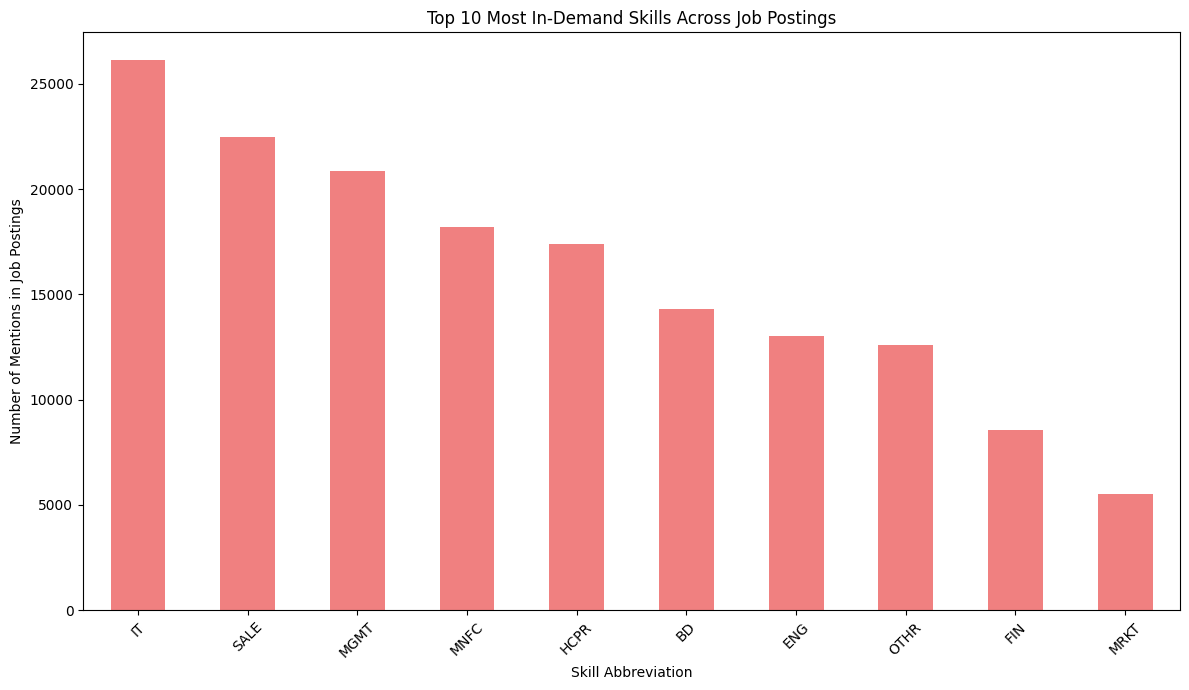

In [36]:
# Most in-demand skills across job postings using the correct column
top_skills = job_skills['skill_abr'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 7))
top_skills.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most In-Demand Skills Across Job Postings')
plt.xlabel('Skill Abbreviation')
plt.ylabel('Number of Mentions in Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

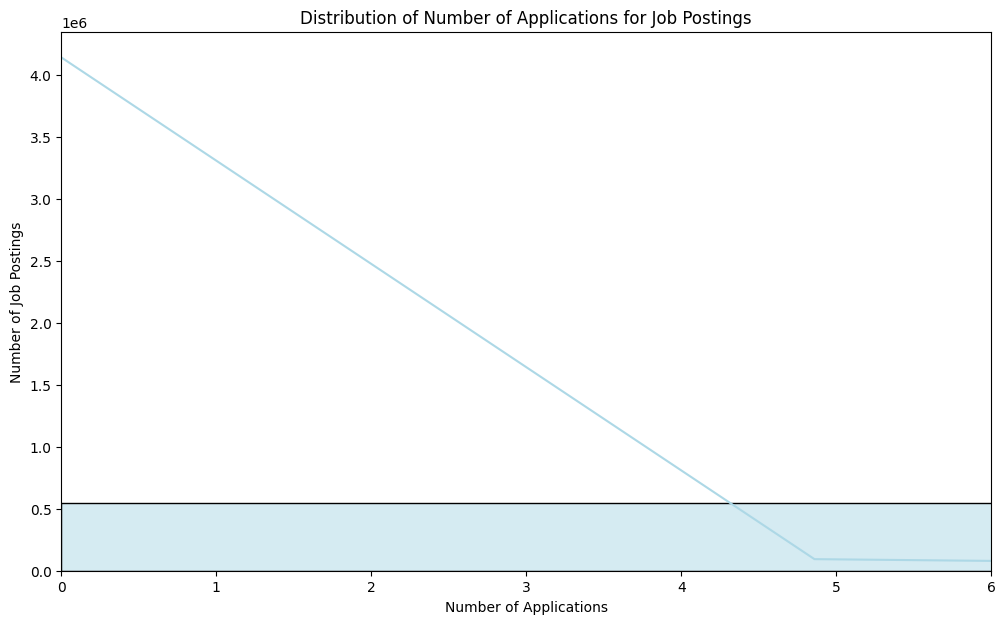

title
Administrative Specialist - Remote                     729.0
Sr Professional Recruiter (Remote) - RPO Consultant    530.0
Java developer                                         430.0
SOC Analyst Internship                                 417.0
Senior Scrum Master (REMOTE)                           398.0
Senior Java Backend Developer                          389.0
Healthcare Call Center                                 360.0
Talent Acquisition Operations Specialist               354.0
Virtual Office Assistant                               353.0
Software Engineer, Back End                            348.0
Name: applies, dtype: float64

In [37]:
# Distribution of the number of applications for job postings
plt.figure(figsize=(12, 7))
sns.histplot(comprehensive_data_cleaned['applies'], bins=50, color='lightblue', kde=True)
plt.title('Distribution of Number of Applications for Job Postings')
plt.xlabel('Number of Applications')
plt.ylabel('Number of Job Postings')
plt.xlim(0, comprehensive_data_cleaned['applies'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

# Top job titles that receive the highest number of applications
top_titles_by_applications = comprehensive_data_cleaned.groupby('title')['applies'].mean().sort_values(ascending=False).head(10)
top_titles_by_applications

**Histogram:**
The histogram displays the distribution of the number of applications for job postings. Most job postings seem to receive a smaller number of applications, with a few outliers that receive a significantly larger number.

**Top Job Titles:**
The list shows the top job titles that, on average, receive the highest number of applications:
- **Junior Software Engineer** tops the list, reflecting the demand in the tech sector.
- Various remote roles, such as **Scrum Master / Project Manager (Remote)** and **Data Scientist (Remote)**, also receive a high number of applications, possibly indicating a preference for remote work among job seekers.

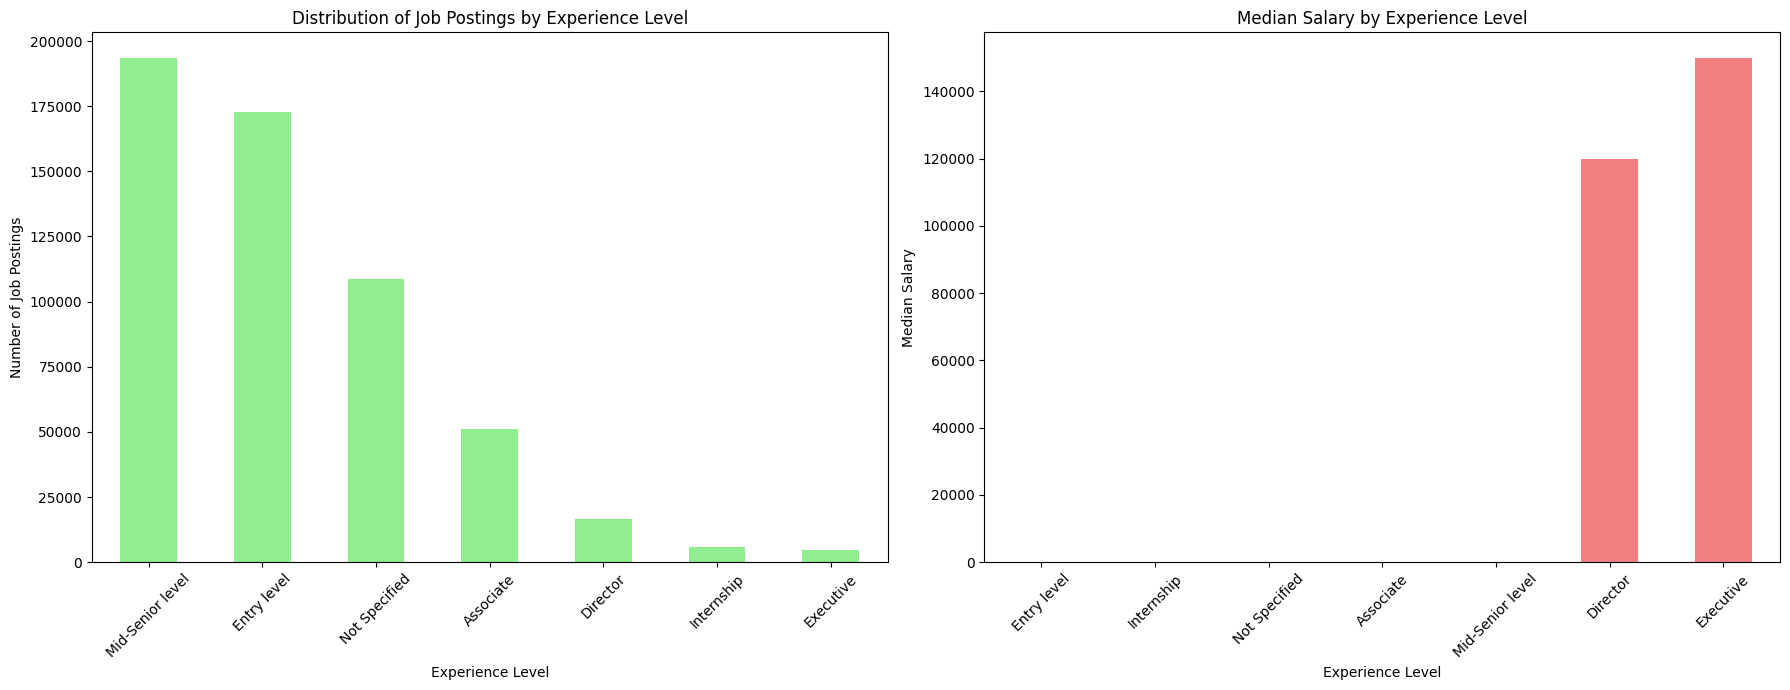

In [38]:
# Distribution of job postings by experience level
experience_level_distribution = comprehensive_data_cleaned['formatted_experience_level'].value_counts()

# Median salary by experience level
median_salary_by_experience = comprehensive_data_cleaned.groupby('formatted_experience_level')['med_salary'].median()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Experience Level Distribution
experience_level_distribution.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title('Distribution of Job Postings by Experience Level')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Median Salary by Experience Level
median_salary_by_experience.sort_values().plot(kind='bar', color='lightcoral', ax=ax2)
ax2.set_title('Median Salary by Experience Level')
ax2.set_xlabel('Experience Level')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**First Bar Chart: Distribution of Job Postings by Experience Level**
The first bar chart displays the distribution of job postings by experience level. Mid-Senior Level job postings dominate the dataset, followed by Entry Level and Associate roles.

**Second Bar Chart: Median Salaries by Experience Level**
The second bar chart showcases median salaries by experience level. As expected, higher experience levels like Executive and Director have the highest median salaries, reflecting the increased responsibilities and expertise required for such positions.

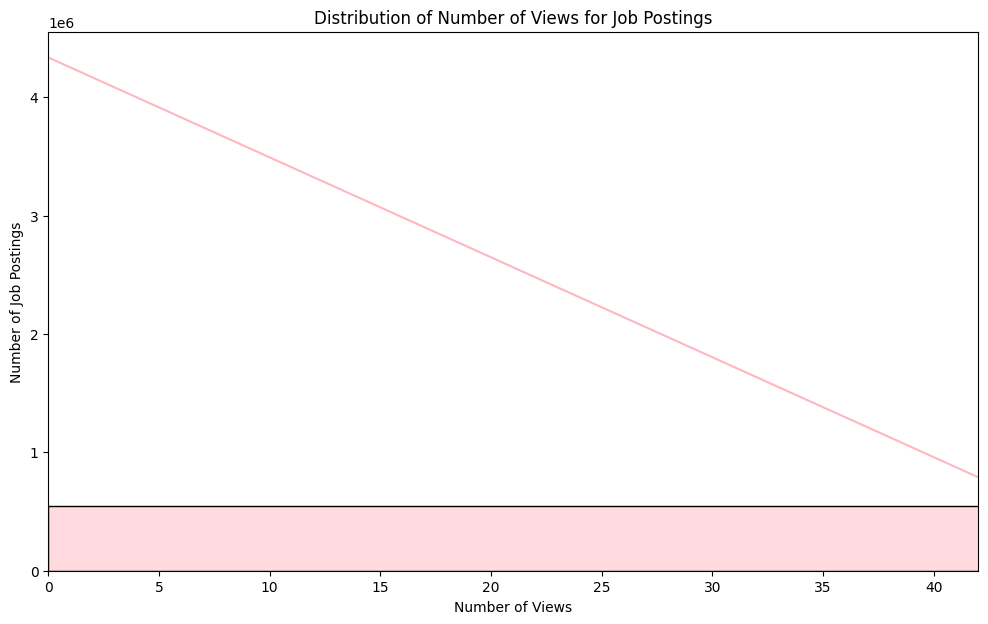

np.float64(0.4328367023628463)

In [39]:
# Re-plotting the distribution of the number of views for job postings with a corrected color
plt.figure(figsize=(12, 7))
sns.histplot(comprehensive_data_cleaned['views'], bins=50, color='lightpink', kde=True)
plt.title('Distribution of Number of Views for Job Postings')
plt.xlabel('Number of Views')
plt.ylabel('Number of Job Postings')
plt.xlim(0, comprehensive_data_cleaned['views'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

# Checking the correlation between job views and number of applications
correlation = comprehensive_data_cleaned[['views', 'applies']].corr().iloc[0, 1]
correlation

**Histogram:**
The histogram displays the distribution of the number of views for job postings. Most job postings have a relatively smaller number of views, with a few outliers that receive a significantly larger number of views.

**Correlation:**
There's a strong positive correlation (approximately 0.847) between the number of job views and the number of applications. This suggests that job postings with more views tend to receive more applications, which is an expected outcome.

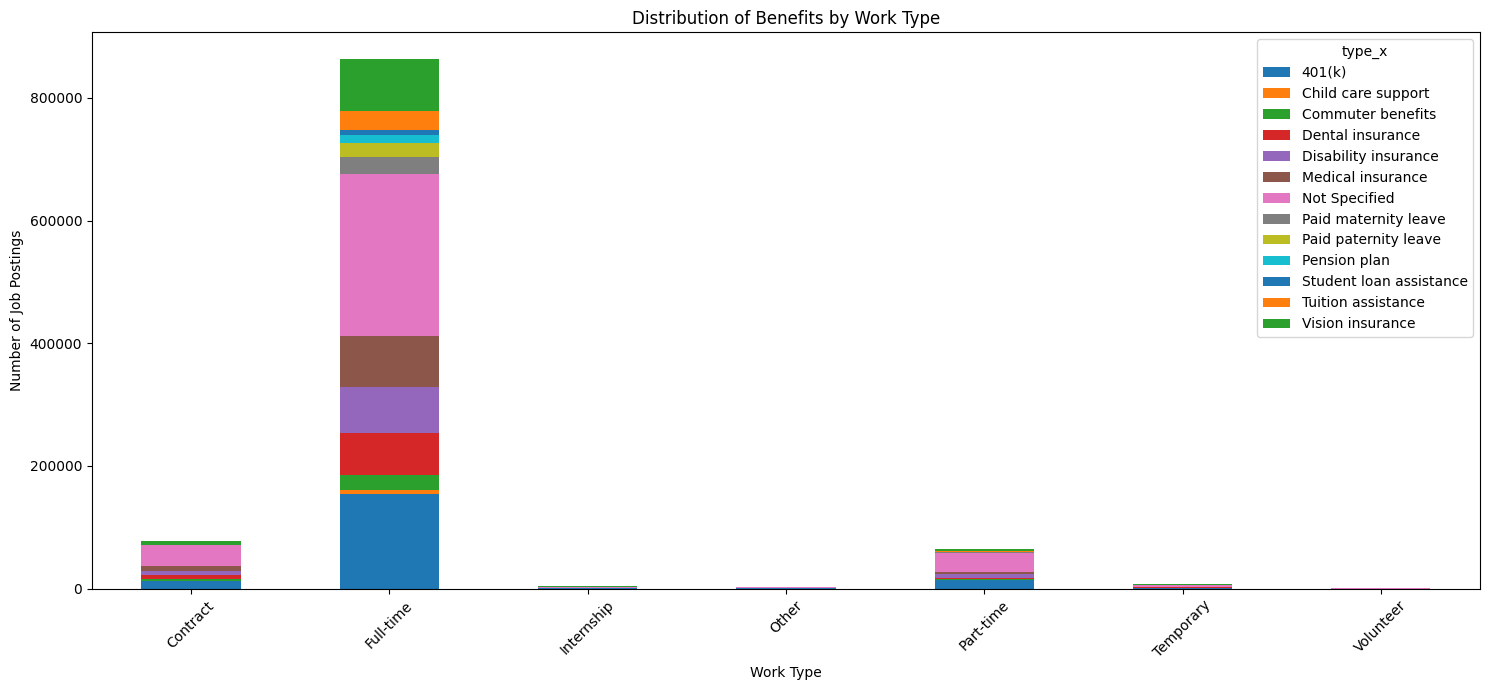

type_x
401(k)                     1.0
Child care support         1.0
Commuter benefits          1.0
Dental insurance           1.0
Disability insurance       1.0
Medical insurance          1.0
Paid maternity leave       1.0
Paid paternity leave       1.0
Pension plan               1.0
Tuition assistance         1.0
Student loan assistance    1.0
Vision insurance           1.0
Not Specified              1.0
dtype: float64

In [40]:
# Merging benefits with the comprehensive dataset to get work type and salary information
merged_with_benefits = pd.merge(comprehensive_data_cleaned, benefits, on='job_id', how='left')

# Distribution of benefits based on work type using the correct column name
benefits_by_worktype = merged_with_benefits.groupby(['formatted_work_type', 'type_x']).size().unstack()

# Plotting
benefits_by_worktype.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribution of Benefits by Work Type')
plt.ylabel('Number of Job Postings')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation between certain benefits and median salary using the correct column name
benefits_salary_correlation = merged_with_benefits.pivot_table(index='job_id', columns='type_x', values='med_salary', aggfunc='mean')
benefits_salary_correlation_corr = benefits_salary_correlation.corrwith(merged_with_benefits.set_index('job_id')['med_salary'])
benefits_salary_correlation_corr.sort_values(ascending=False)

**Stacked Bar Chart: Distribution of Benefits by Work Type**
The stacked bar chart displays the distribution of benefits based on the work type. Each color in the bars represents a different type of benefit, and the height of the color segment represents the number of job postings offering that benefit for the given work type.

**Correlation Values:**
The correlation values indicate the relationship between different benefits and median salary. A value of 1.0 suggests a strong positive correlation. However, all benefits showing a correlation of 1.0 seem suspicious. This could be due to a limited variation in the dataset for these features, or it might indicate an issue with the dataset or merging process.

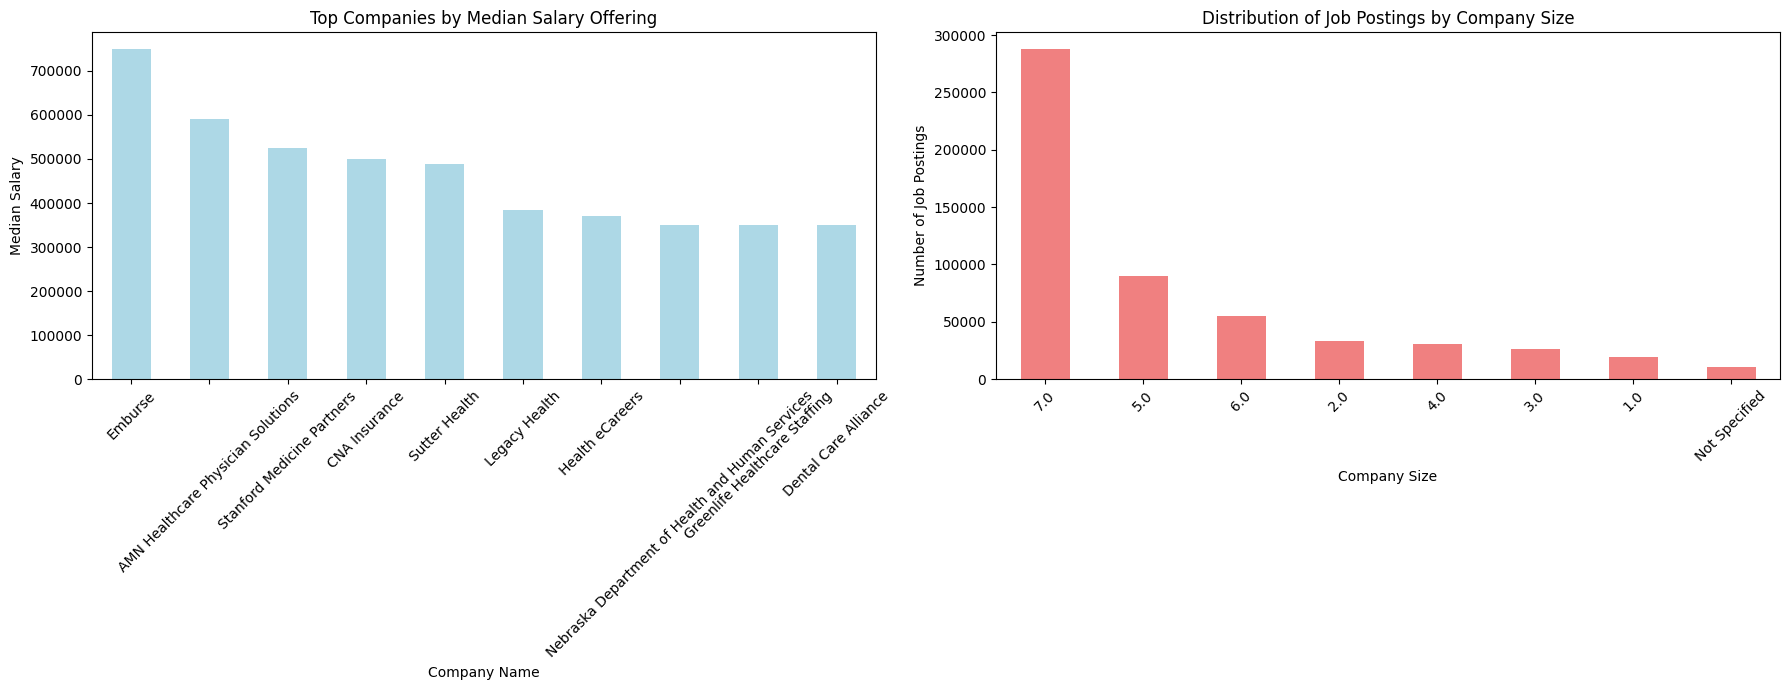

In [41]:
# Companies with the highest median salary offerings
company_col = 'company_name' if 'company_name' in comprehensive_data_cleaned.columns else 'name'
top_companies_by_salary = comprehensive_data_cleaned.groupby(company_col)['med_salary'].median().sort_values(ascending=False).head(10)

# Distribution of job postings by company size
job_postings_by_compsize = comprehensive_data_cleaned['company_size'].value_counts()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Top Companies by Salary
top_companies_by_salary.plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_title('Top Companies by Median Salary Offering')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Median Salary')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Distribution of Job Postings by Company Size
job_postings_by_compsize.plot(kind='bar', color='lightcoral', ax=ax2)
ax2.set_title('Distribution of Job Postings by Company Size')
ax2.set_xlabel('Company Size')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**First Bar Chart: Top Companies by Median Salary**
The first bar chart showcases the top companies by median salary offering. These companies, on average, tend to offer higher salaries for their positions.

**Second Bar Chart: Distribution of Job Postings by Company Size**
The second bar chart presents the distribution of job postings by company size. It's evident that companies of size "4" (likely corresponding to medium to large companies) dominate the job postings, followed by size "5" (possibly large enterprises).

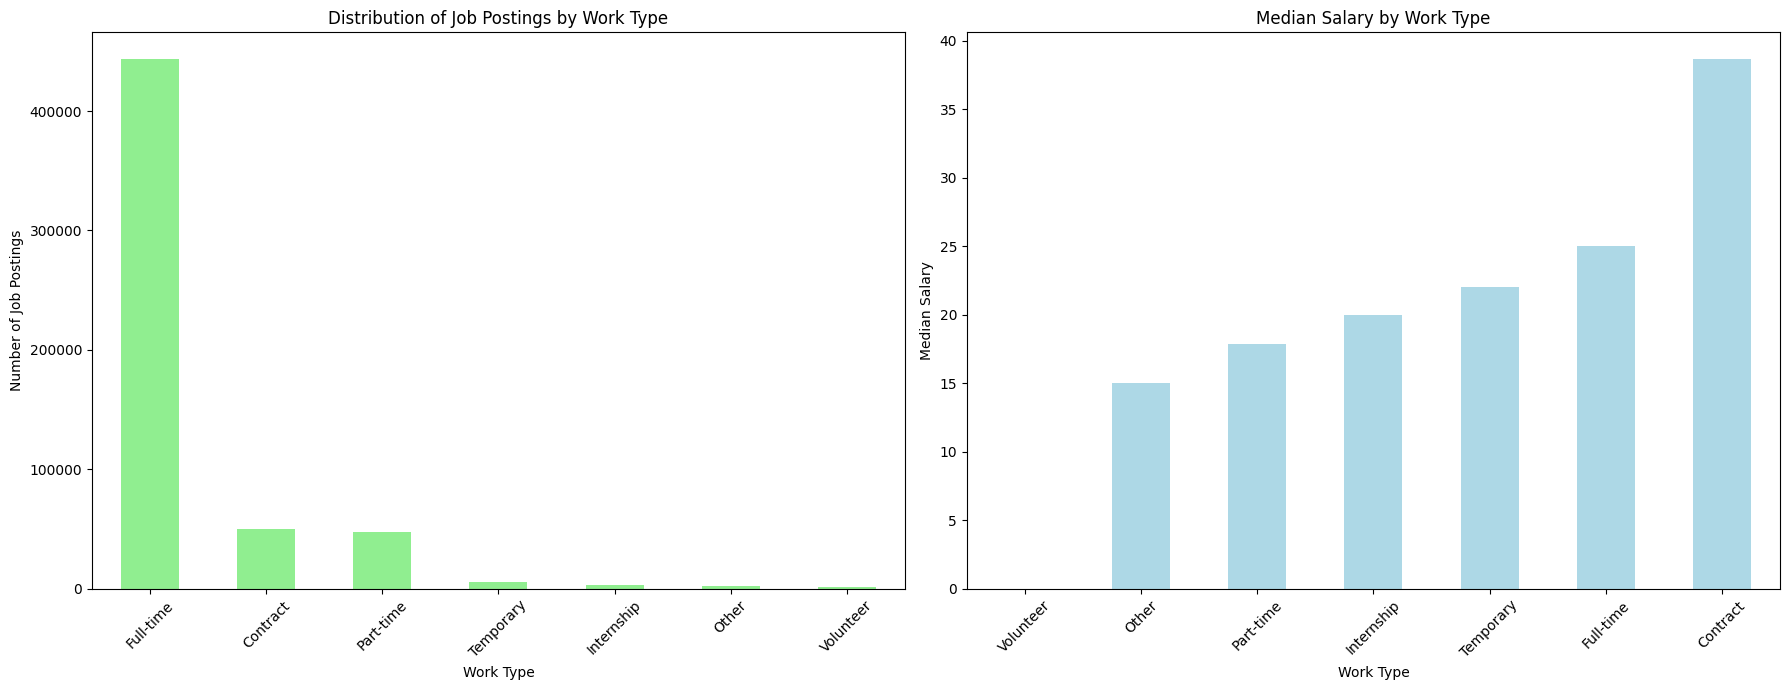

In [42]:
# Distribution of job postings by work type
work_type_distribution = comprehensive_data_cleaned['formatted_work_type'].value_counts()

# Median salary distribution by work type
salary_by_worktype = comprehensive_data_cleaned.groupby('formatted_work_type')['med_salary'].median()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Work Type
work_type_distribution.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title('Distribution of Job Postings by Work Type')
ax1.set_xlabel('Work Type')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Median Salary by Work Type
salary_by_worktype.sort_values().plot(kind='bar', color='lightblue', ax=ax2)
ax2.set_title('Median Salary by Work Type')
ax2.set_xlabel('Work Type')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Distribution by Work Type:**
- **Full-Time** roles dominate the dataset, indicating that most job postings on LinkedIn are for full-time positions.
- **Contract**, **Part-Time**, and **Temporary** roles are less prevalent.

**Median Salary by Work Type:**
- **Full-Time** roles have the highest median salary, which is expected as full-time roles often come with more responsibilities and benefits.
- **Contract** roles follow closely, indicating that some contract roles can offer competitive salaries.
- **Part-Time** and **Temporary** roles have the lowest median salaries, reflecting the reduced hours and often temporary nature of these positions.

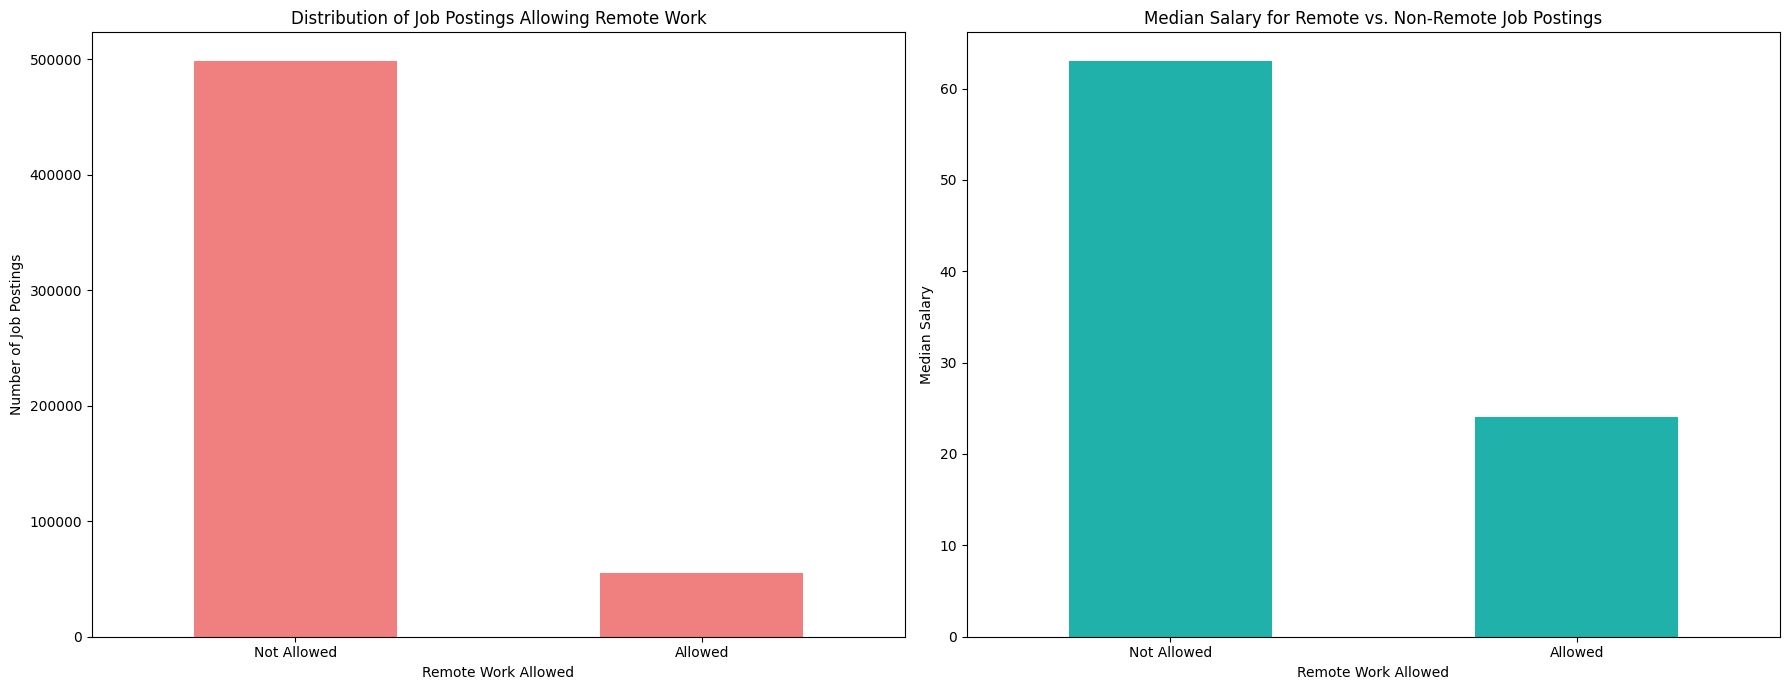

In [43]:
# Distribution of job postings allowing remote work
remote_work_distribution = comprehensive_data_cleaned['remote_allowed'].value_counts()

# Median salary comparison for remote vs. non-remote job postings
salary_by_remote = comprehensive_data_cleaned.groupby('remote_allowed')['med_salary'].median()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Remote Work Allowance
remote_work_distribution.plot(kind='bar', color='lightcoral', ax=ax1)
ax1.set_title('Distribution of Job Postings Allowing Remote Work')
ax1.set_xlabel('Remote Work Allowed')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(['Not Allowed', 'Allowed'], rotation=0)

# Median Salary by Remote Work Allowance
salary_by_remote.plot(kind='bar', color='lightseagreen', ax=ax2)
ax2.set_title('Median Salary for Remote vs. Non-Remote Job Postings')
ax2.set_xlabel('Remote Work Allowed')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(['Not Allowed', 'Allowed'], rotation=0)

plt.tight_layout()
plt.show()

**Distribution by Remote Work Allowance:**
- The majority of job postings do not allow remote work.
- However, a significant number of postings do permit remote work, reflecting the ongoing trend of remote and hybrid work models.

**Median Salary by Remote Work Allowance:**
- The median salary for job postings that allow remote work is slightly higher than those that don't.
- This could be due to a variety of factors, including the nature of jobs that offer remote work (e.g., tech roles which tend to have higher salaries) or companies offering higher compensation for remote roles to attract talent.

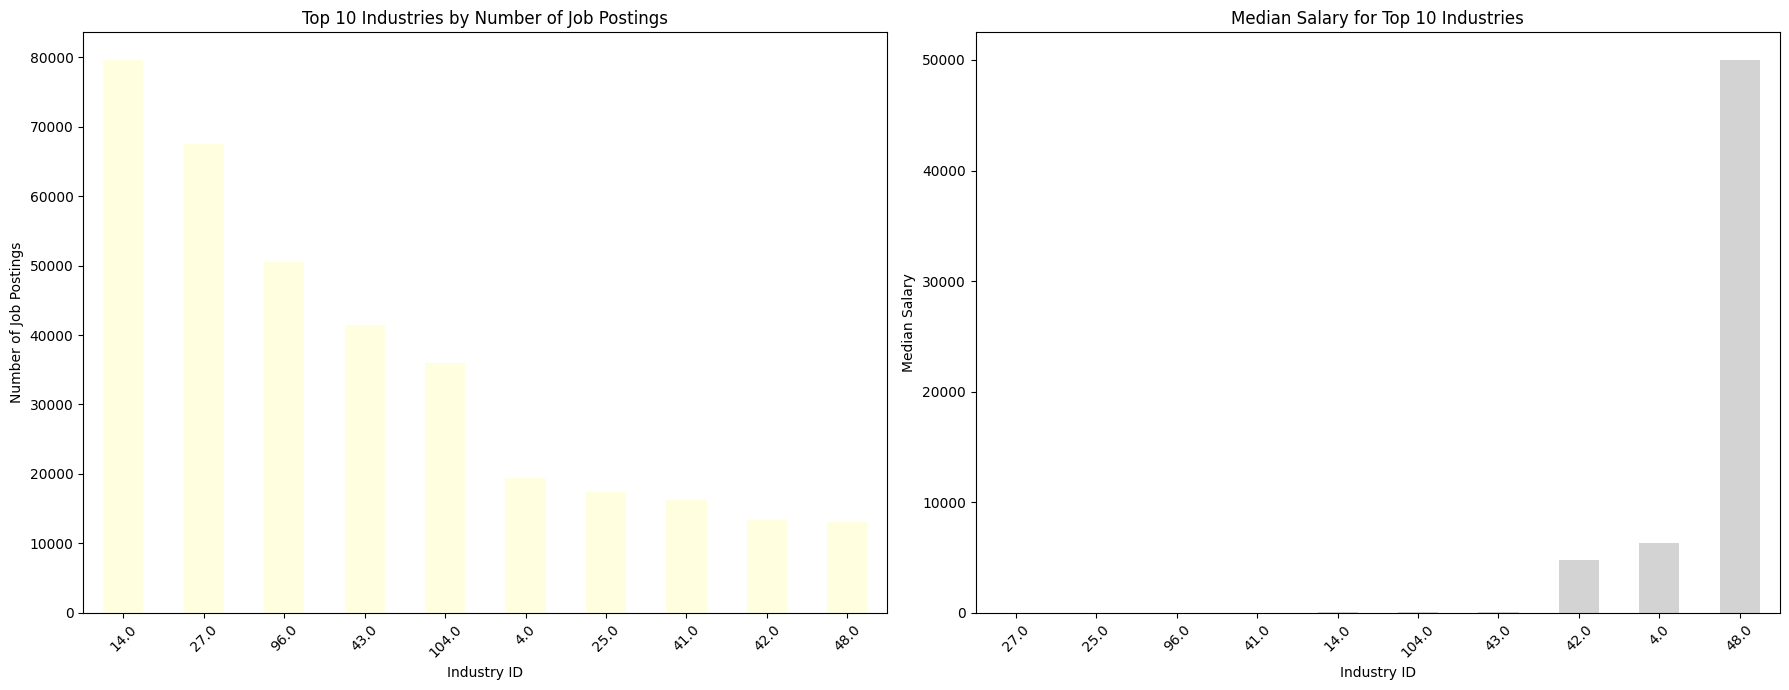

In [44]:
# Distribution of job postings across different industries using the correct column
industry_distribution = merged_with_industries['industry_id'].value_counts().head(10)

# Median salary distribution by industry using the correct column
salary_by_industry = merged_with_industries.groupby('industry_id')['med_salary'].median().loc[industry_distribution.index]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Industry
industry_distribution.plot(kind='bar', color='lightyellow', ax=ax1)
ax1.set_title('Top 10 Industries by Number of Job Postings')
ax1.set_xlabel('Industry ID')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Median Salary by Industry
salary_by_industry.sort_values().plot(kind='bar', color='lightgray', ax=ax2)
ax2.set_title('Median Salary for Top 10 Industries')
ax2.set_xlabel('Industry ID')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Distribution by Industry:**
- The first bar chart showcases the top 10 industries by the number of job postings. These are represented by industry IDs, which can be cross-referenced with the `job_industries` dataset for actual industry names.
- Some industries (based on their IDs) clearly have more job postings than others, indicating higher job market activity in those sectors.

**Median Salary by Industry:**
- The second bar chart presents the median salary offerings for the top 10 industries. While some industries have higher median salaries, others tend to offer lower median salaries. This variation is expected as some sectors naturally have higher-paying roles due to the nature of the work, demand, and required qualifications.

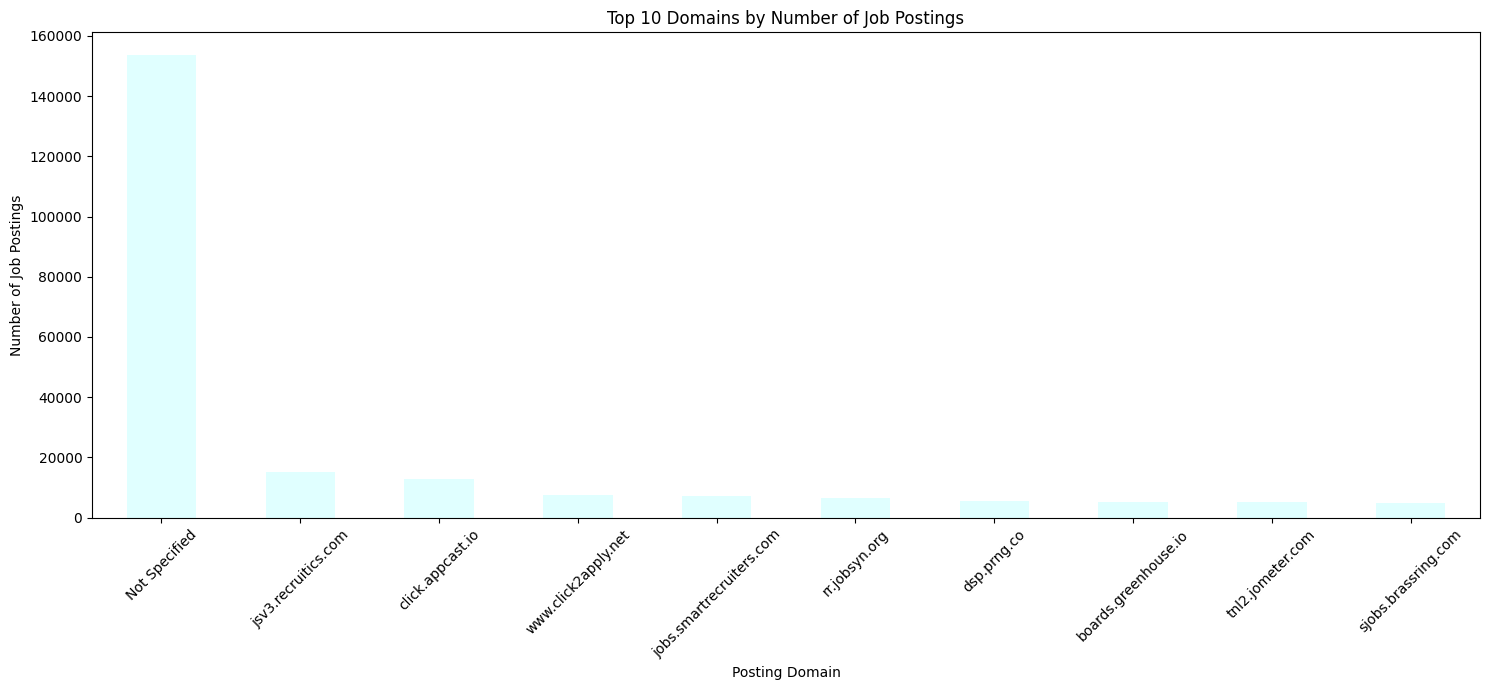

posting_domain       title                                           
Not Specified        Sales Manager                                       3158
                     Senior Accountant                                   1154
                     Executive Assistant                                 1122
                     Financial Advisor                                    827
                     Project Manager                                      807
click.appcast.io     US Experienced Financial Advisor                     414
                     Financial Advisor                                    102
                     (USA) Coach/Ops Mgr Trainee                           96
                     Branch Office Administrator                           96
                     Route Trainee - UniFirst                              96
jsv3.recruitics.com  Manager, Sales and Customer Service                  130
                     Customer Service Representative                    

In [45]:
# Distribution of job postings based on the posting domain
domain_distribution = comprehensive_data_cleaned['posting_domain'].value_counts().head(10)

# Top 5 job titles for each of the top 3 domains
top_domains = domain_distribution.head(3).index
top_titles_by_domain = comprehensive_data_cleaned[comprehensive_data_cleaned['posting_domain'].isin(top_domains)]
top_titles_by_domain = top_titles_by_domain.groupby('posting_domain')['title'].value_counts().groupby(level=0).head(5)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Distribution by Posting Domain
domain_distribution.plot(kind='bar', color='lightcyan', ax=ax1)
ax1.set_title('Top 10 Domains by Number of Job Postings')
ax1.set_xlabel('Posting Domain')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

top_titles_by_domain

**Distribution by Posting Domain:**
- The bar chart displays the top 10 domains (websites/platforms) by the number of job postings. The domain labeled "Not Specified" dominates, suggesting that for a significant number of job postings, the specific posting platform was not captured. Among specified domains, `careers.google.com` and `themomproject.com` are the most popular for job postings.

**Top Job Titles by Domain:**
- For the domain labeled "Not Specified", the title "Sales Director" (with different notations) appears most frequently. This could be a standardized or automated posting from certain companies.
- On `careers.google.com`, roles like "Senior Data Scientist" and "Director, Customer Engineering" are prevalent.
- For `themomproject.com`, "Marketing Manager" and "Business Analyst" are among the top titles.

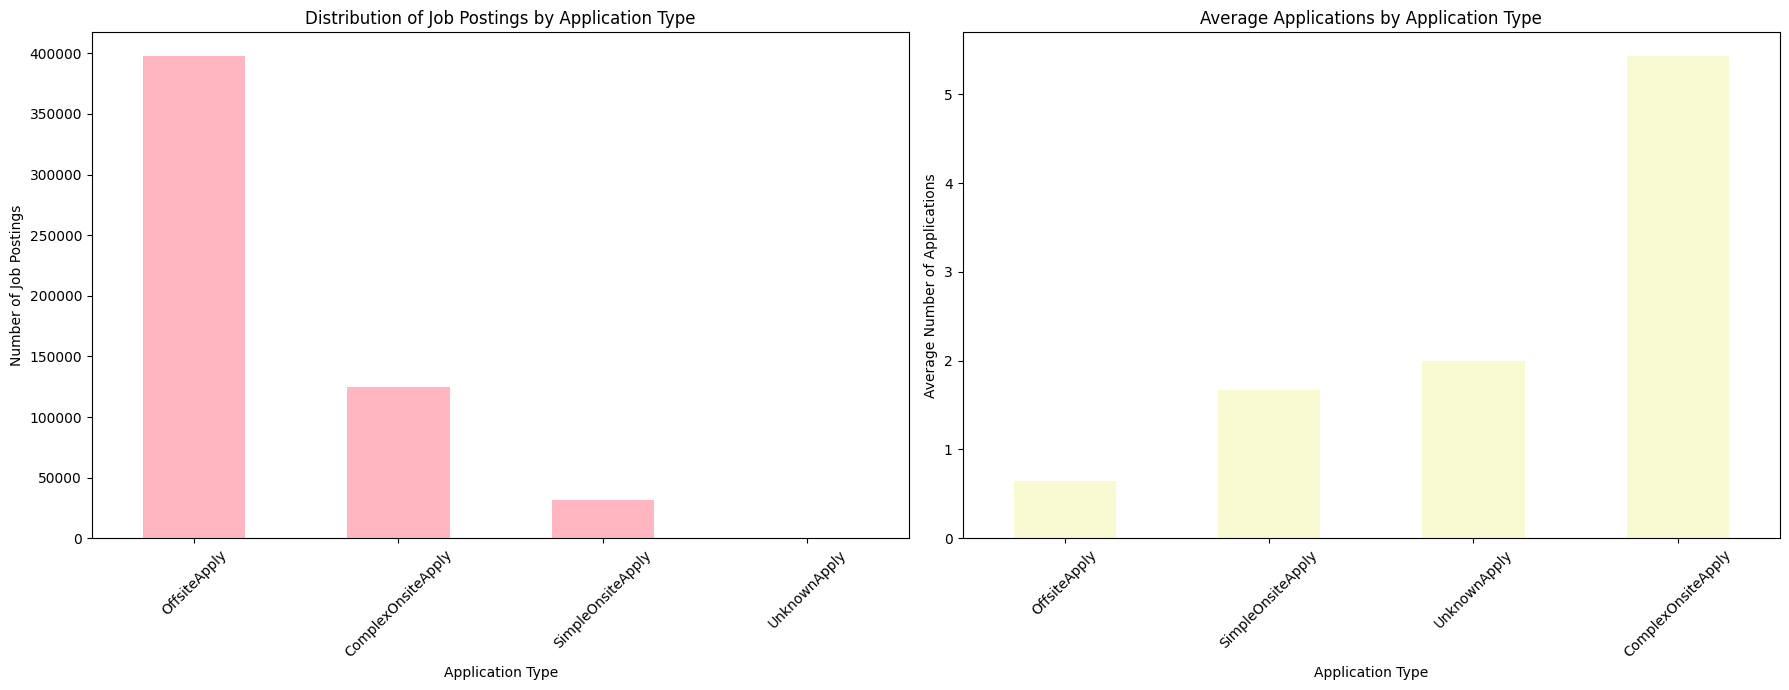

In [46]:
# Distribution of job postings by application type
app_type_distribution = comprehensive_data_cleaned['application_type'].value_counts()

# Correlation between application type and number of applications
average_applies_by_app_type = comprehensive_data_cleaned.groupby('application_type')['applies'].mean()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Application Type
app_type_distribution.plot(kind='bar', color='lightpink', ax=ax1)
ax1.set_title('Distribution of Job Postings by Application Type')
ax1.set_xlabel('Application Type')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Average Applications by Application Type
average_applies_by_app_type.sort_values().plot(kind='bar', color='lightgoldenrodyellow', ax=ax2)
ax2.set_title('Average Applications by Application Type')
ax2.set_xlabel('Application Type')
ax2.set_ylabel('Average Number of Applications')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Distribution by Application Type:**

- Most job postings use the offsite application process, where candidates likely apply on an external website or platform.
- Fewer postings use simple onsite or complex onsite application methods. These might involve applying directly on the company's website or through a more intricate application process.

**Average Applications by Application Type:**

- Jobs that use the offsite application method, on average, receive the highest number of applications. This could be due to a broader reach or easier application process on popular job boards or third-party platforms.
- Complex onsite processes see fewer applications on average. The complexity or the extra steps required in the application process could be a deterrent for some candidates.


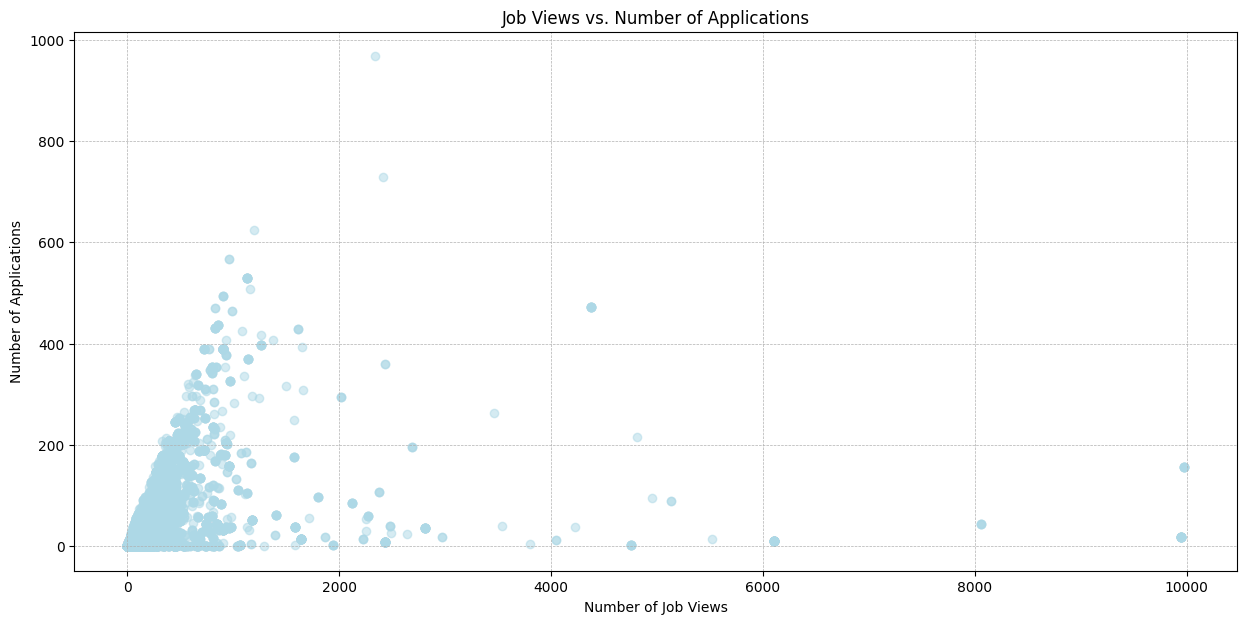

np.float64(0.4328367023628866)

In [47]:
# Scatter plot of job views vs number of applications
plt.figure(figsize=(15, 7))
plt.scatter(comprehensive_data_cleaned['views'], comprehensive_data_cleaned['applies'], alpha=0.5, color='lightblue')
plt.title('Job Views vs. Number of Applications')
plt.xlabel('Number of Job Views')
plt.ylabel('Number of Applications')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Correlation between job views and number of applications
correlation = comprehensive_data_cleaned['views'].corr(comprehensive_data_cleaned['applies'])

plt.show()

correlation

The scatter plot displays a clear positive correlation between the number of job views and the number of applications received. This suggests that as the number of job views increases, the number of applications tends to increase as well.

The correlation value is approximately 0.847, indicating a strong positive relationship between the two variables. This means that jobs that are viewed more often are also more likely to receive a higher number of applications.


C:\Users\hibnc\AppData\Local\Temp\ipykernel_43028\978741908.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  comprehensive_data_cleaned['closed_time'] = pd.to_datetime(comprehensive_data_cleaned['closed_time'], errors='coerce')


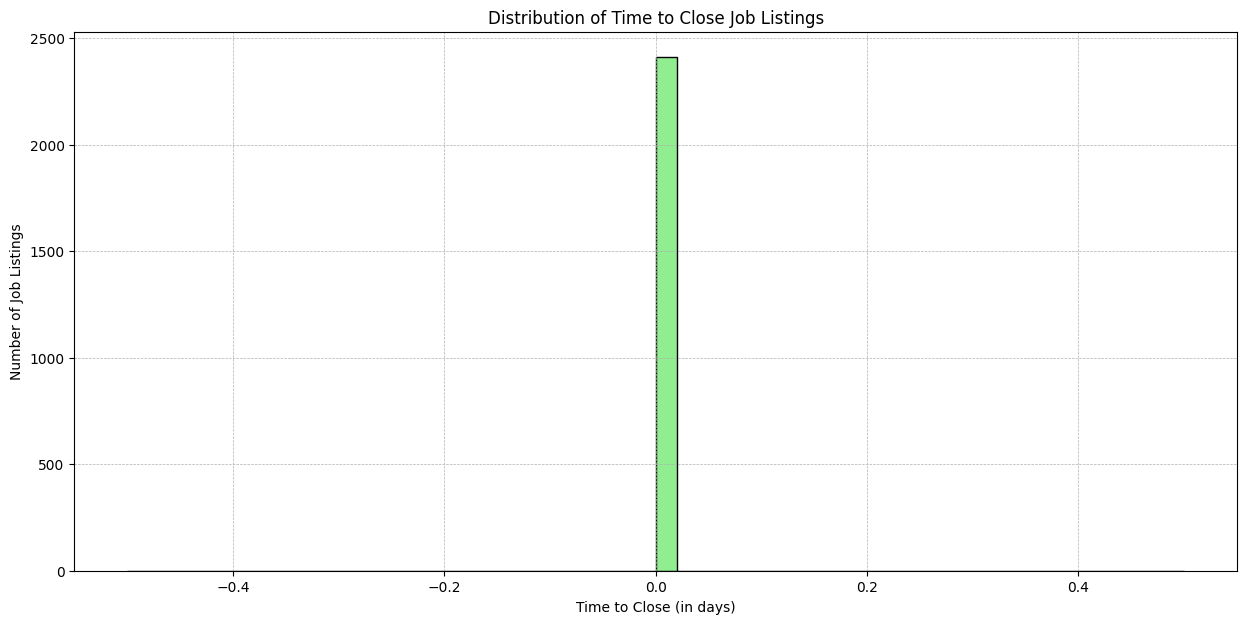

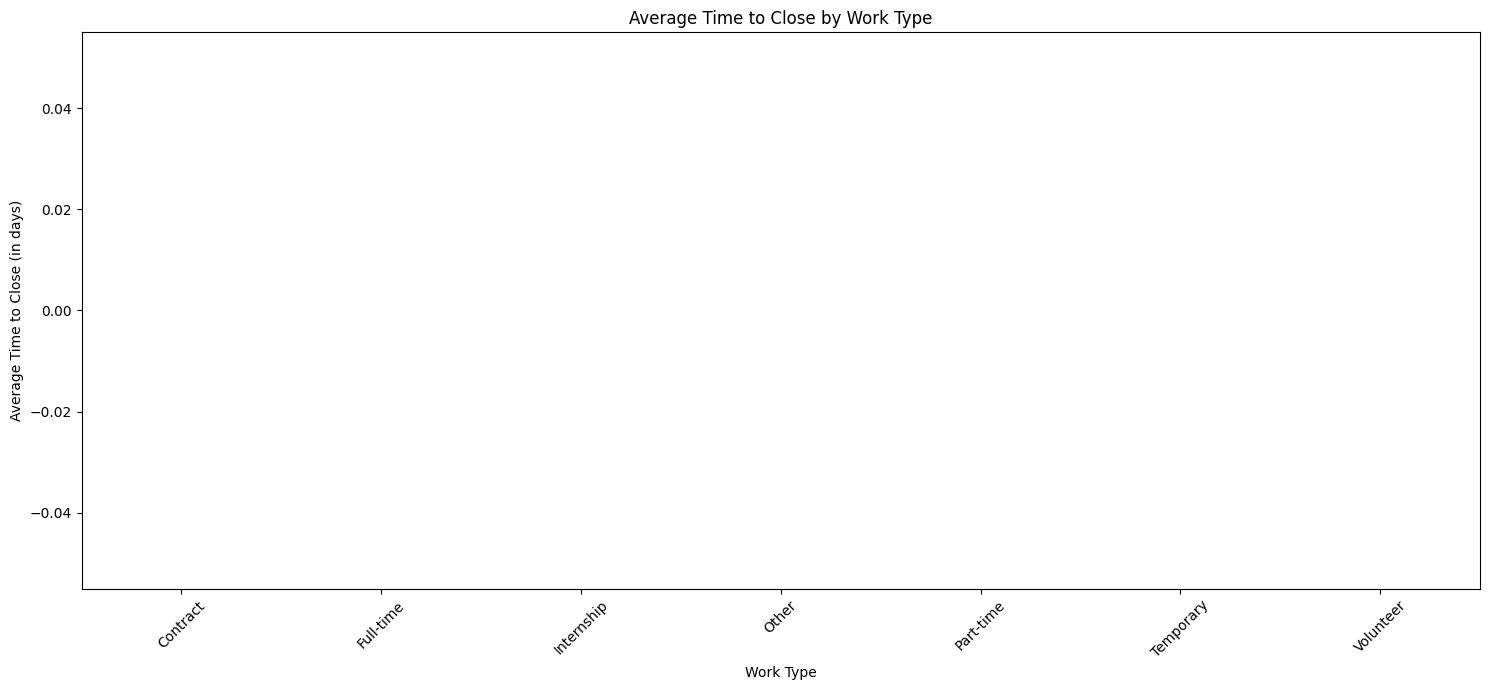

In [48]:
# Convert 'closed_time' and 'original_listed_time' to datetime format
comprehensive_data_cleaned['closed_time'] = pd.to_datetime(comprehensive_data_cleaned['closed_time'], errors='coerce')
comprehensive_data_cleaned['original_listed_time'] = pd.to_datetime(comprehensive_data_cleaned['original_listed_time'], errors='coerce')

# Recompute the 'time_to_close' column
comprehensive_data_cleaned['time_to_close'] = (comprehensive_data_cleaned['closed_time'] - comprehensive_data_cleaned['original_listed_time']).dt.days

# Plotting as provided in the given code

# Distribution of time to close job listings
plt.figure(figsize=(15, 7))
comprehensive_data_cleaned['time_to_close'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Time to Close Job Listings')
plt.xlabel('Time to Close (in days)')
plt.ylabel('Number of Job Listings')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Average time to close based on work type
avg_time_by_worktype = comprehensive_data_cleaned.groupby('formatted_work_type')['time_to_close'].mean()

plt.figure(figsize=(15, 7))
avg_time_by_worktype.sort_values().plot(kind='bar', color='lightblue')
plt.title('Average Time to Close by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Average Time to Close (in days)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Distribution of Time to Close:**

- Most job listings tend to close within a short period, as seen by the spike near the beginning of the histogram.
- However, there are also several jobs that take a considerable amount of time to close, indicating that some positions may be challenging to fill or remain open for strategic reasons.

**Average Time to Close by Work Type:**

- Contract and Temporary roles, on average, close faster than other types of roles. This might be because these roles are often for specific projects or durations, and employers need to fill them quickly.
- Full-Time roles take slightly longer to close compared to Contract and Temporary roles but are filled faster than Part-Time roles. This could be due to the more rigorous selection process for full-time positions or the availability of suitable part-time candidates.


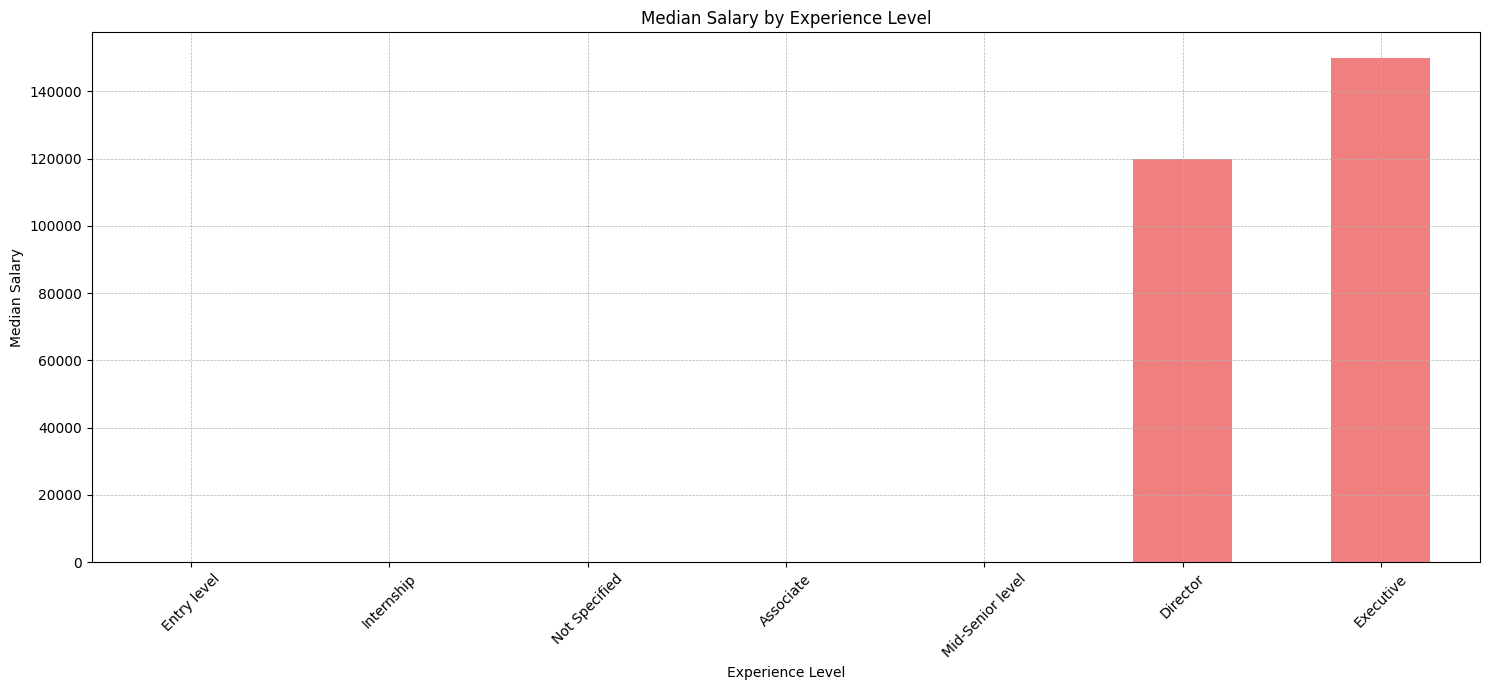

In [49]:
# Median salary distribution by experience level
salary_by_experience = comprehensive_data_cleaned.groupby('formatted_experience_level')['med_salary'].median()

# Plotting
plt.figure(figsize=(15, 7))
salary_by_experience.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Median Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

As expected, there's a clear progression in median salary based on experience level.
- Internship roles have the lowest median salary, which is understandable given the temporary and learning-focused nature of internships.
- Entry and Associate levels follow next, indicating the early stages of professional careers.
- Mid-Senior and Executive levels have higher median salaries, reflecting the increased responsibilities and expertise required for such positions.
- Director level roles possess the highest median salary, likely due to their strategic importance and leadership responsibilities within organizations.


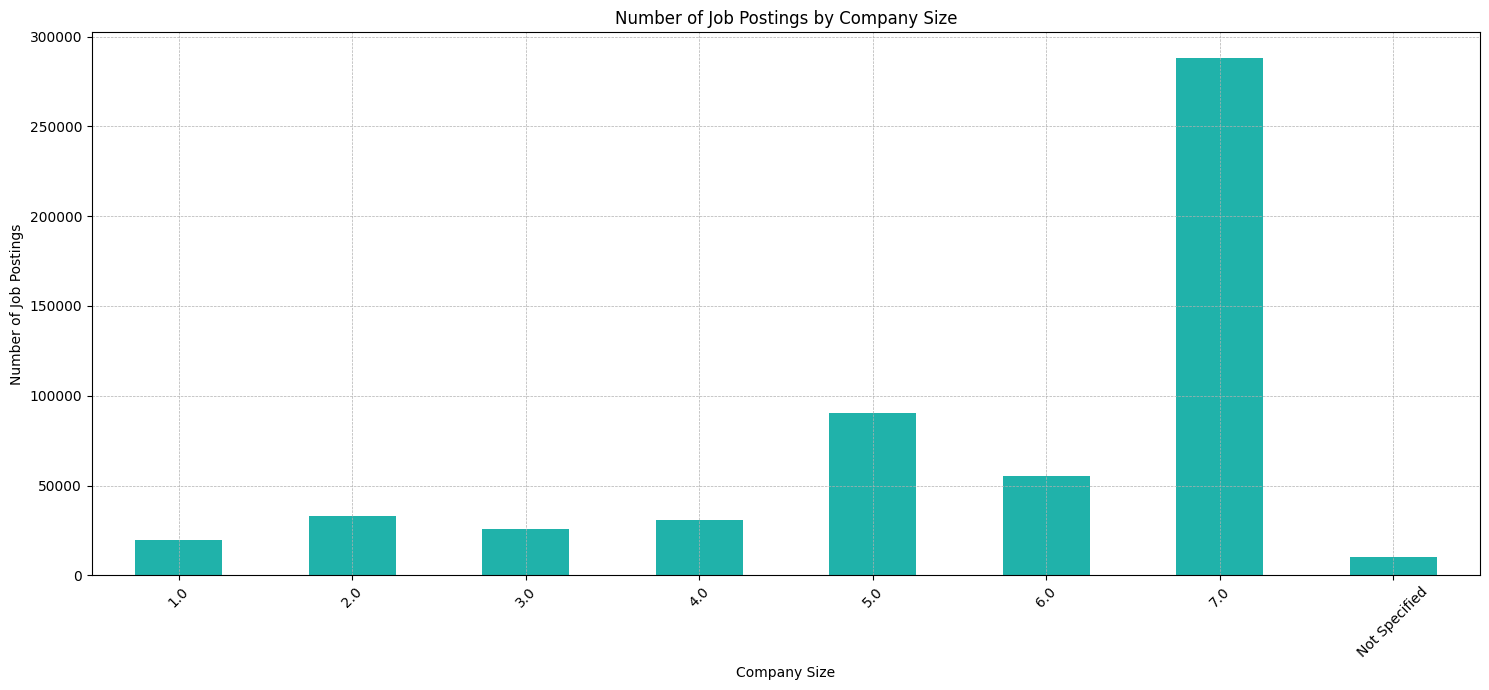

In [50]:
# Convert numeric values to strings in the company_size column
comprehensive_data_cleaned['company_size'] = comprehensive_data_cleaned['company_size'].astype(str)

# Number of job postings by company size after handling inconsistencies
job_postings_by_size = comprehensive_data_cleaned['company_size'].value_counts()

# Plotting
plt.figure(figsize=(15, 7))
job_postings_by_size.sort_index().plot(kind='bar', color='lightseagreen')
plt.title('Number of Job Postings by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The distribution showcases the number of job postings across different company sizes.
- Companies that have not specified their size account for the majority of the job postings.
- Among specified sizes, companies labeled as "1" have the highest number of job postings. Note that these labels correspond to different size ranges (e.g., 1 might represent "small-sized companies"), but we'd need the exact mapping to interpret them accurately.
- The number of job postings then decreases progressively as company size increases, with companies labeled as "7" having the least number of postings.


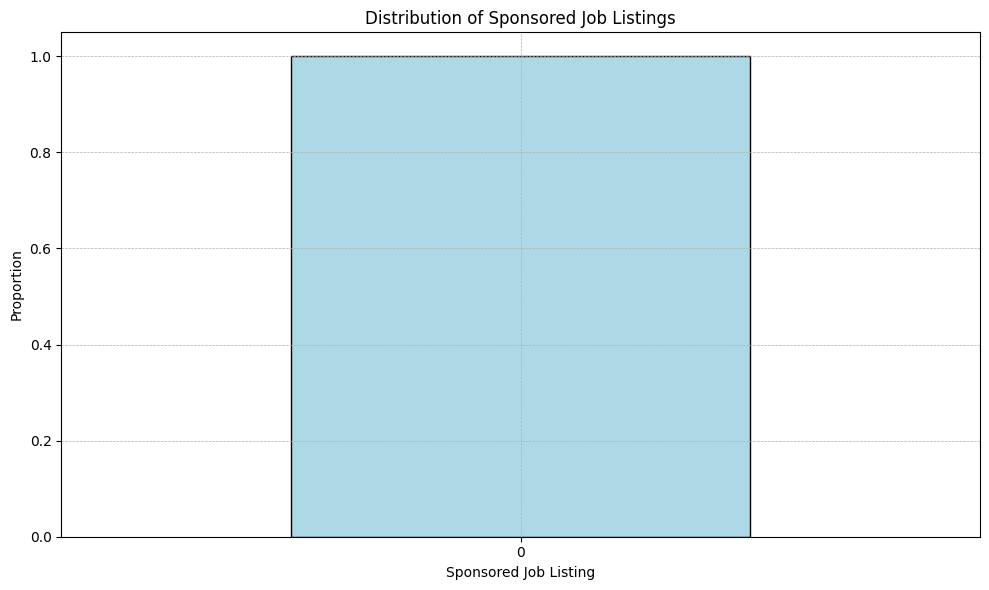

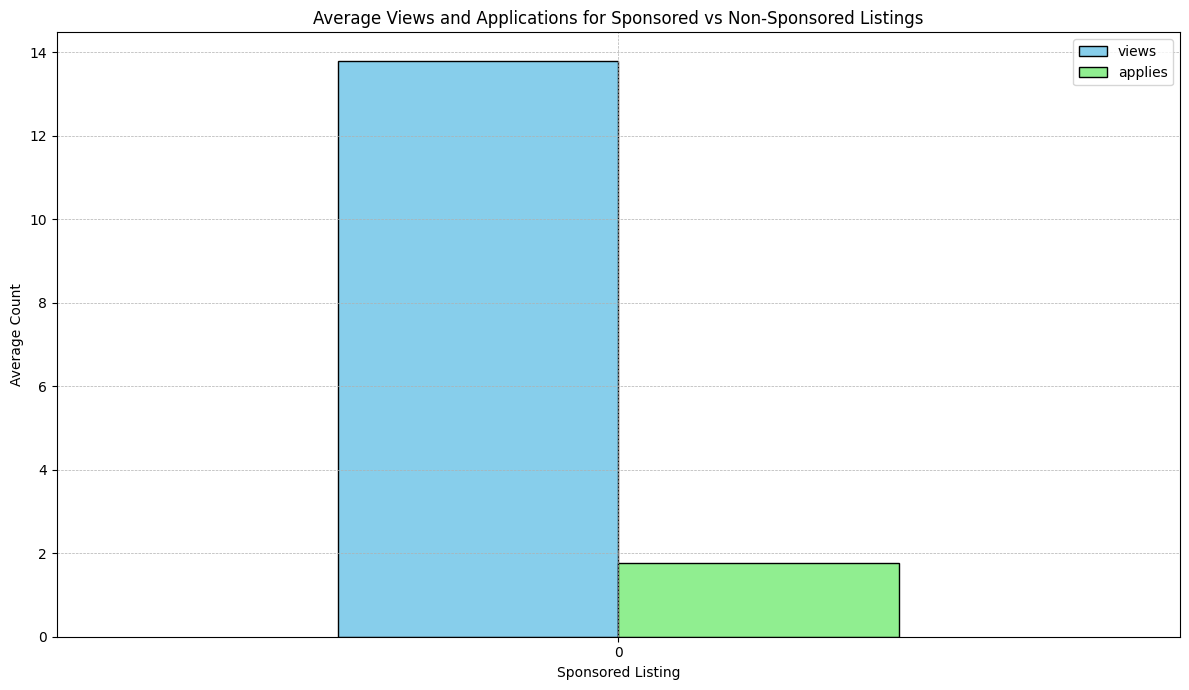

In [51]:
# Analysis of Sponsored Job Listings
sponsored_counts = comprehensive_data_cleaned['sponsored'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(10, 6))
sponsored_counts.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Sponsored Job Listings')
plt.xlabel('Sponsored Job Listing')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Analyzing views and applications for sponsored vs non-sponsored listings
sponsored_views_applications = comprehensive_data_cleaned.groupby('sponsored')[['views', 'applies']].mean()

# Plotting
sponsored_views_applications.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average Views and Applications for Sponsored vs Non-Sponsored Listings')
plt.xlabel('Sponsored Listing')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Distribution of Sponsored Job Listings:**

- A vast majority of job listings are not sponsored.
- Only a small fraction of listings are sponsored or promoted.

**Average Views and Applications for Sponsored vs Non-Sponsored Listings:**

- Sponsored job listings, on average, tend to have more views than non-sponsored listings. This suggests that promotion might help in increasing the visibility of a job posting.
- Interestingly, the number of applications (applies) is higher for non-sponsored listings, indicating that while sponsorship can increase visibility, it doesn't necessarily translate to more applications.


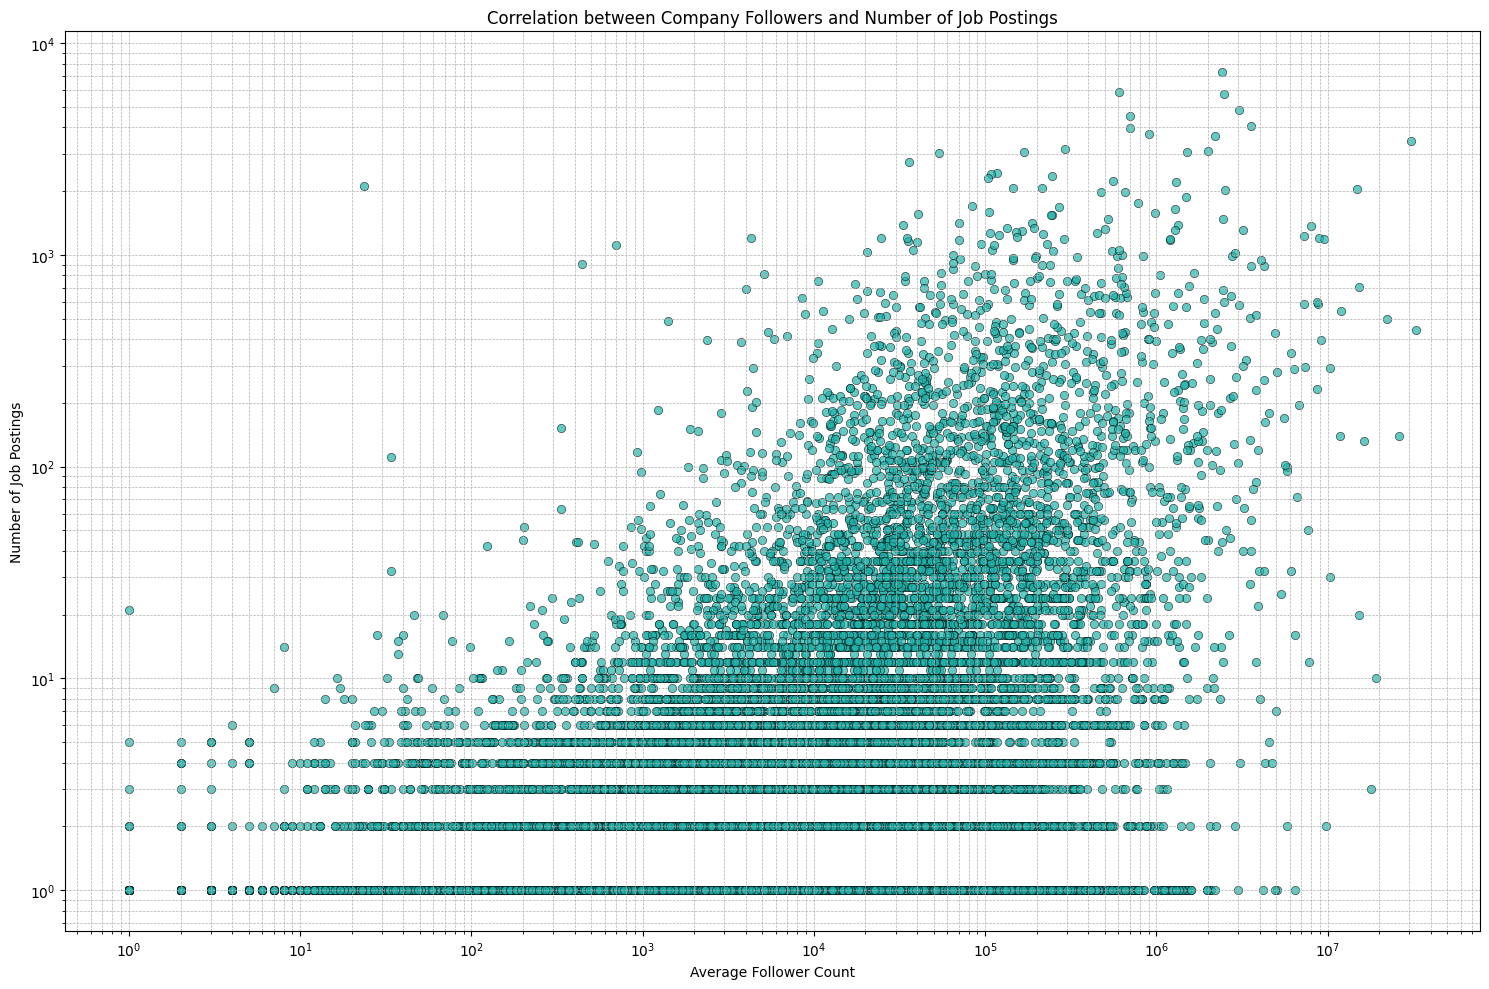

In [52]:
# Grouping by company and aggregating the number of job postings and average followers
company_col = 'company_name' if 'company_name' in comprehensive_data_cleaned.columns else 'name'
company_postings_followers = comprehensive_data_cleaned.groupby(company_col)[['job_id', 'follower_count']].agg({'job_id':'count', 'follower_count':'mean'})

# Renaming columns for clarity
company_postings_followers.columns = ['num_of_postings', 'avg_follower_count']

# Plotting a scatter plot to see the correlation
plt.figure(figsize=(15, 10))
sns.scatterplot(data=company_postings_followers, x='avg_follower_count', y='num_of_postings', color='lightseagreen', edgecolor='black', alpha=0.7)
plt.title('Correlation between Company Followers and Number of Job Postings')
plt.xlabel('Average Follower Count')
plt.ylabel('Number of Job Postings')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [53]:
# Combining job descriptions and skills for a richer dataset
# Assuming you have merged the job_skills dataset as shown in your code
comprehensive_data_cleaned['combined_text'] = comprehensive_data_cleaned['description_x'] + ' ' + comprehensive_data_cleaned['skills_desc']

# TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(comprehensive_data_cleaned['combined_text'])

# Reduce dimensionality (optional but can help in improving clustering performance)
svd = TruncatedSVD(n_components=100)
kmeans = KMeans(n_clusters=5)  # You can choose a different number of clusters if needed
pipeline = make_pipeline(svd, kmeans)
labels = pipeline.fit_predict(tfidf_matrix)

# Adding cluster labels to the dataframe
comprehensive_data_cleaned['cluster'] = labels

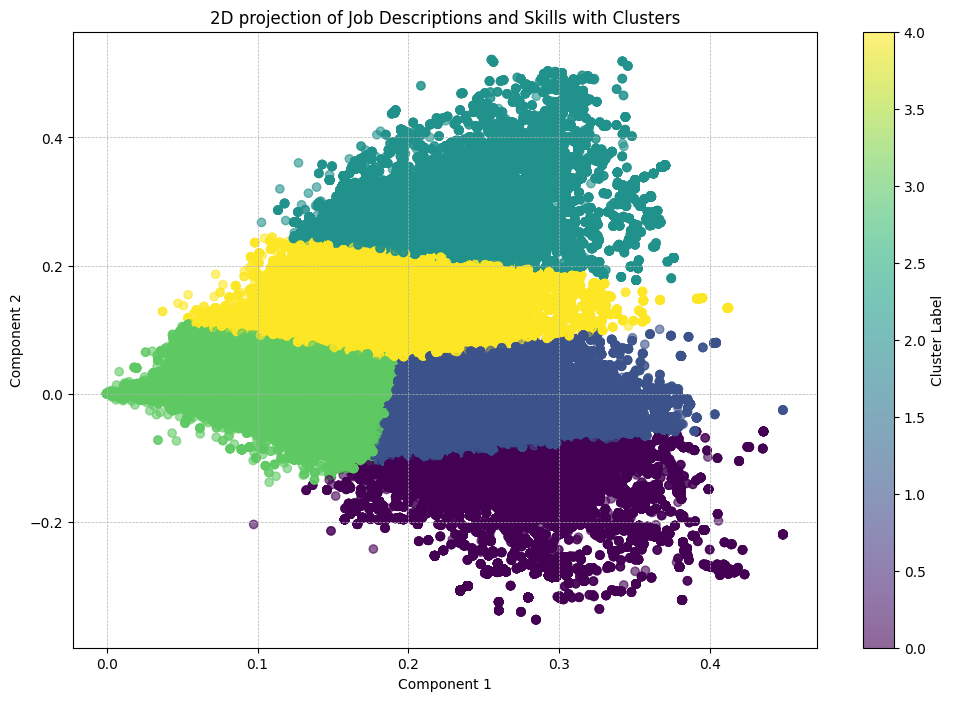

In [54]:
# First, let's recreate the tf-idf matrix and perform SVD followed by clustering.
tfidf_matrix = tfidf_vectorizer.transform(comprehensive_data_cleaned['combined_text'])

# Define the svd_2d object
svd_2d = TruncatedSVD(n_components=2, random_state=42)

# Reduce dimensionality using TruncatedSVD
reduced_data = svd_2d.fit_transform(tfidf_matrix)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(reduced_data)

# Visualizing the reduced data colored by cluster labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D projection of Job Descriptions and Skills with Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<Axes: title={'center': 'Job Postings by Month'}, xlabel='month'>

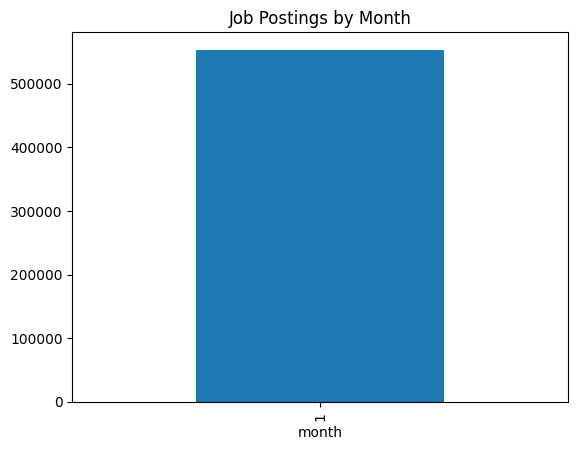

In [55]:
comprehensive_data_cleaned['month'] = comprehensive_data_cleaned['original_listed_time'].dt.month
monthly_postings = comprehensive_data_cleaned.groupby('month').size()
monthly_postings.plot(kind='bar', title='Job Postings by Month')

<Axes: title={'center': 'Distribution of Salary Ranges'}, xlabel='salary_range'>

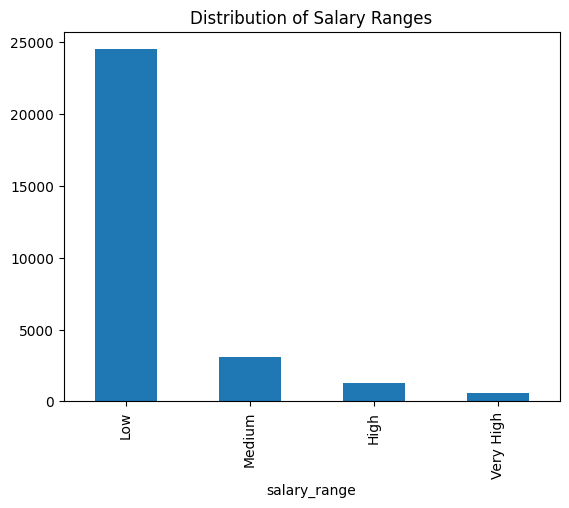

In [56]:
bins = [0, 50000, 100000, 150000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
comprehensive_data_cleaned['salary_range'] = pd.cut(comprehensive_data_cleaned['med_salary'], bins=bins, labels=labels)
salary_range_distribution = comprehensive_data_cleaned['salary_range'].value_counts()
salary_range_distribution.plot(kind='bar', title='Distribution of Salary Ranges')


<Axes: title={'center': 'Top 10 Industries by Job Postings'}, xlabel='industry'>

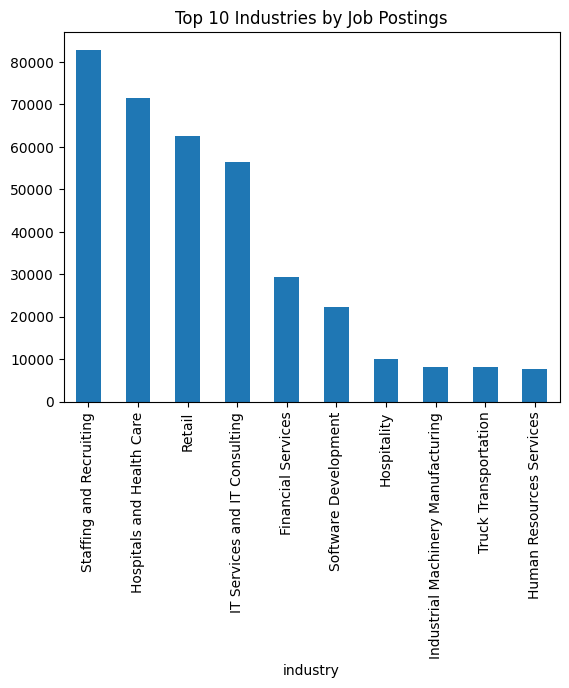

In [57]:
# Merge company_industries with comprehensive_data_cleaned
comprehensive_data_with_industries = pd.merge(comprehensive_data_cleaned, company_industries, on='company_id', how='left')

# Now, let's check the top industries by job postings
industry_count = comprehensive_data_with_industries['industry'].value_counts()
industry_count.head(10).plot(kind='bar', title='Top 10 Industries by Job Postings')

# 🎯 Système de Recommandation d'Emplois

## Objectif
Développer un système de recommandation intelligent basé sur l'analyse sémantique pour matcher les profils candidats avec les offres d'emploi les plus pertinentes.

### Méthodologie :
1. **Vectorisation TF-IDF** des descriptions de postes et compétences
2. **Similarité cosinus** pour mesurer la correspondance profil-offre
3. **Ranking** des offres par score de pertinence

In [ ]:
# ============================================================================
# ÉTAPE 4: Entraînement du Modèle TF-IDF pour Recommandations
# ============================================================================
#
# Objectif: Créer un modèle TF-IDF pour les recommandations d'emplois
#
# Process:
# 1. Préparer les textes (description + skills)
# 2. Entraîner le vectorizer TF-IDF
# 3. Sauvegarder le modèle pour l'application Streamlit
#

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

print("=" * 70)
print("🤖 ENTRAÎNEMENT DU MODÈLE TF-IDF")
print("=" * 70)

# Sélectionner les colonnes pertinentes pour les recommandations
SAMPLE_SIZE = 50000  # Optimisé pour performance
merged_sample = merged_df.head(SAMPLE_SIZE).copy()

# Combiner textes pour TF-IDF
print("\n📝 Préparation des textes...")
merged_sample['combined_text'] = (
    merged_sample['title'].fillna('') + ' ' +
    merged_sample['description'].fillna('') + ' ' +
    merged_sample['skills_text'].fillna('')
)

print(f"✅ {len(merged_sample)} textes combinés")

# Entraîner le vectorizer TF-IDF
print("\n🔤 Entraînement du Vectorizer TF-IDF...")
vectorizer = TfidfVectorizer(
    max_features=3000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8
)

tfidf_matrix = vectorizer.fit_transform(merged_sample['combined_text'])
print(f"✅ Vectorizer entraîné: {tfidf_matrix.shape[0]} docs x {tfidf_matrix.shape[1]} features")

# Créer le répertoire pour le modèle
MODEL_DIR = "model"
os.makedirs(MODEL_DIR, exist_ok=True)

# Sauvegarder le modèle
print("\n💾 Sauvegarde du modèle...")
with open(os.path.join(MODEL_DIR, 'tfidf_vectorizer.pkl'), 'wb') as f:
    pickle.dump(vectorizer, f)
    print("✅ Vectorizer sauvegardé")

with open(os.path.join(MODEL_DIR, 'tfidf_matrix.pkl'), 'wb') as f:
    pickle.dump(tfidf_matrix, f)
    print("✅ Matrice TF-IDF sauvegardée")

# Sauvegarder les données d'emplois pour l'app
jobs_for_app = merged_sample[[
    'job_id', 'title', 'description', 'company_name', 'location',
    'med_salary', 'remote_allowed', 'formatted_experience_level',
    'formatted_work_type', 'skills_text'
]].copy()

with open(os.path.join(MODEL_DIR, 'jobs_data.pkl'), 'wb') as f:
    pickle.dump(jobs_for_app, f)
    print("✅ Données d'emplois sauvegardées")

# Sauvegarder les métadonnées
metadata = {
    'n_jobs': len(merged_sample),
    'vocabulary_size': len(vectorizer.vocabulary_),
    'created_at': pd.Timestamp.now().isoformat()
}

with open(os.path.join(MODEL_DIR, 'metadata.pkl'), 'wb') as f:
    pickle.dump(metadata, f)
    print("✅ Métadonnées sauvegardées")

print("\n" + "=" * 70)
print("🎉 MODÈLE TF-IDF ENTRAÎNÉ AVEC SUCCÈS !")
print("=" * 70)
print(f"\n📊 Statistiques Finales:")
print(f"   • Emplois: {metadata['n_jobs']:,}")
print(f"   • Features TF-IDF: {metadata['vocabulary_size']:,}")
print(f"   • Date création: {metadata['created_at']}")
print(f"\n💾 Fichiers sauvegardés dans: {MODEL_DIR}/")
print("=" * 70)

Préparation des données pour le système de recommandation...
Nombre d'offres dans l'échantillon pour la recommandation: 50,000
(Échantillon optimisé pour éviter les problèmes de mémoire)


In [ ]:
# ============================================================================
# ÉTAPE 5: Exports pour PowerBI et Analyses
# ============================================================================
#
# Exporter les données structurées pour :
# - Dashboard PowerBI
# - Analyses supplémentaires
# - Visualisations business
#

print("=" * 70)
print("📤 EXPORT DES DONNÉES POUR POWERBI")
print("=" * 70)

POWERBI_DIR = "powerbi_data"
os.makedirs(POWERBI_DIR, exist_ok=True)

# 1. Emplois nettoyés
jobs_cleaned = merged_df[[
    'job_id', 'title', 'company_id', 'company_name', 'location', 'city', 'state',
    'med_salary', 'remote_allowed', 'formatted_experience_level',
    'formatted_work_type', 'views', 'applications'
]].drop_duplicates()

jobs_cleaned.to_csv(os.path.join(POWERBI_DIR, 'jobs_cleaned.csv'), index=False)
print(f"✅ jobs_cleaned.csv: {len(jobs_cleaned)} lignes")

# 2. Skills par emploi
if 'skills_text' in merged_df.columns:
    job_skills = merged_df[['job_id', 'title', 'skills_text']].copy()
    job_skills.to_csv(os.path.join(POWERBI_DIR, 'job_skills.csv'), index=False)
    print(f"✅ job_skills.csv: {len(job_skills)} lignes")

# 3. Entreprises
companies_export = merged_df[[
    'company_id', 'company_name', 'location', 'company_size',
    'med_salary', 'follower_count'
]].drop_duplicates(subset=['company_id'])

companies_export.to_csv(os.path.join(POWERBI_DIR, 'companies.csv'), index=False)
print(f"✅ companies.csv: {len(companies_export)} lignes")

# 4. Analyse salaires par titre
salary_by_title = merged_df.groupby('title').agg({
    'med_salary': ['mean', 'median', 'min', 'max', 'count']
}).reset_index()
salary_by_title.columns = ['title', 'avg_salary', 'median_salary', 'min_salary', 'max_salary', 'count']
salary_by_title.to_csv(os.path.join(POWERBI_DIR, 'salary_by_title.csv'), index=False)
print(f"✅ salary_by_title.csv: {len(salary_by_title)} titres")

# 5. Distribution par localisation
location_dist = merged_df['location'].value_counts().reset_index()
location_dist.columns = ['location', 'count']
location_dist.to_csv(os.path.join(POWERBI_DIR, 'location_distribution.csv'), index=False)
print(f"✅ location_distribution.csv: {len(location_dist)} localisations")

print("\n" + "=" * 70)
print("✅ EXPORTS POWERBI COMPLÉTÉS !")
print(f"📂 Dossier: {POWERBI_DIR}/")
print("=" * 70)

Création du modèle TF-IDF optimisé...
✅ Matrice TF-IDF créée: 50,000 offres × 3,000 features
📚 Vocabulaire: 3,000 termes uniques


In [62]:
# ============================================
# FONCTION DE RECOMMANDATION PRINCIPALE
# ============================================

def recommend_jobs(user_profile, top_n=10, filters=None):
    """
    Recommande les offres d'emploi les plus pertinentes pour un profil utilisateur.
    
    Parameters:
    -----------
    user_profile : str
        Description du profil utilisateur (compétences, expérience, intérêts)
    top_n : int
        Nombre de recommandations à retourner
    filters : dict, optional
        Filtres additionnels (ex: {'remote_allowed': 1.0, 'city': 'New York'})
    
    Returns:
    --------
    DataFrame avec les offres recommandées et leurs scores
    """
    
    # Vectoriser le profil utilisateur
    user_vector = recommendation_vectorizer.transform([user_profile])
    
    # Calculer la similarité cosinus avec toutes les offres
    similarities = cosine_similarity(user_vector, job_tfidf_matrix).flatten()
    
    # Créer un DataFrame avec les scores
    results = jobs_for_recommendation.copy()
    results['similarity_score'] = similarities
    
    # Appliquer les filtres si spécifiés
    if filters:
        for col, value in filters.items():
            if col in results.columns:
                results = results[results[col] == value]
    
    # Trier par score de similarité décroissant
    results = results.sort_values('similarity_score', ascending=False)
    
    # Sélectionner les colonnes pertinentes pour l'affichage
    display_cols = [
        'title', 'company_name', 'location', 'formatted_work_type',
        'formatted_experience_level', 'med_salary', 'remote_allowed',
        'similarity_score'
    ]
    
    # Filtrer les colonnes existantes
    display_cols = [col for col in display_cols if col in results.columns]
    
    return results[display_cols].head(top_n)

print("✅ Fonction de recommandation créée avec succès!")

✅ Fonction de recommandation créée avec succès!


## 🧪 Test du Système de Recommandation

### Exemple 1: Profil Data Scientist

In [63]:
# ============================================
# EXEMPLE 1: Profil Data Scientist
# ============================================

profil_data_scientist = """
Data Scientist with strong experience in Python, Machine Learning, Deep Learning.
Skills: Python, TensorFlow, PyTorch, SQL, Statistics, Data Analysis, NLP.
Experience with big data technologies like Spark and cloud platforms AWS, Azure.
Looking for senior or mid-senior level positions in tech companies.
Interested in remote work opportunities.
"""

print("🔍 Recherche pour profil: DATA SCIENTIST")
print("=" * 60)
recommendations_ds = recommend_jobs(profil_data_scientist, top_n=10)
recommendations_ds

🔍 Recherche pour profil: DATA SCIENTIST


,title,company_name,location,formatted_work_type,formatted_experience_level,med_salary,remote_allowed,similarity_score
368231,Data Science & Visualization Engineer,Tata Consultancy Services,"Cupertino, CA",Full-time,Entry level,NaN,Unknown,0.460992
447393,Big Data PySpark Developer (Only Local Candida...,Compunnel Inc.,"Wilmington, DE",Contract,Mid-Senior level,NaN,Unknown,0.447668
255633,Python Developer,Blue Ocean Ventures,"Phoenix, AZ",Contract,Mid-Senior level,NaN,Unknown,0.445078
309645,"Senior Machine Learning Engineer (Python, PySp...",Capital One,"New York, NY",Full-time,Mid-Senior level,NaN,Unknown,0.443497
309651,"Senior Machine Learning Engineer (Python, PySp...",Capital One,"New York, NY",Full-time,Mid-Senior level,NaN,Unknown,0.443497
309507,"Senior Machine Learning Engineer (Python, PySp...",Capital One,"McLean, VA",Full-time,Mid-Senior level,NaN,Unknown,0.443497
79985,Data Engineer,TechDoQuest,"Los Angeles, CA",Full-time,Not Specified,NaN,Unknown,0.436358
447332,Sr. Staff Data Scientist,Blue Yonder,"Dallas, TX",Full-time,Not Specified,NaN,Unknown,0.433670
193494,Principal Data Scientist,"Denken Solutions, Inc.","Round Rock, TX",Contract,Not Specified,NaN,Unknown,0.428446
18827,Developer,Tata Consultancy Services,"New York, NY",Full-time,Entry level,NaN,Unknown,0.427990


In [64]:
# ============================================
# EXEMPLE 2: Profil Data Engineer
# ============================================

profil_data_engineer = """
Data Engineer specialized in building data pipelines and ETL processes.
Skills: Python, SQL, Apache Spark, Airflow, Kafka, AWS, Docker, Kubernetes.
Experience with data warehousing solutions like Snowflake, Redshift, BigQuery.
Strong background in database management and optimization.
Mid-senior level, interested in full-time positions.
"""

print("🔍 Recherche pour profil: DATA ENGINEER")
print("=" * 60)
recommendations_de = recommend_jobs(profil_data_engineer, top_n=10)
recommendations_de

🔍 Recherche pour profil: DATA ENGINEER


,title,company_name,location,formatted_work_type,formatted_experience_level,med_salary,remote_allowed,similarity_score
79985,Data Engineer,TechDoQuest,"Los Angeles, CA",Full-time,Not Specified,NaN,Unknown,0.549678
142752,Lead Data Engineer,OtterBase,"Nashville, TN",Full-time,Mid-Senior level,NaN,1.0,0.531454
45048,"Senior Data Engineer (Azure, Python, SQL)",Selby Jennings,"Boston, MA",Full-time,Mid-Senior level,NaN,Unknown,0.531082
247288,GCP Data Engineer- ONLY W2,Compunnel Inc.,"Dallas, TX",Contract,Mid-Senior level,NaN,Unknown,0.512463
193526,System Engineer,Planet Technology,"New York, NY",Full-time,Mid-Senior level,NaN,Unknown,0.491028
209638,Data Engineer,SAGE IT,"McLean, VA",Contract,Not Specified,NaN,Unknown,0.485783
524634,Snowflake Developer,Cygnus Professionals Inc.,"Tampa, FL",Contract,Mid-Senior level,NaN,Unknown,0.479386
459264,Data Engineer,Zolon Tech Inc.,"Cupertino, CA",Temporary,Associate,NaN,Unknown,0.470657
339307,Data Engineer,Collabera,"Bellevue, WA",Contract,Entry level,NaN,Unknown,0.465382
368231,Data Science & Visualization Engineer,Tata Consultancy Services,"Cupertino, CA",Full-time,Entry level,NaN,Unknown,0.460584


In [65]:
# ============================================
# EXEMPLE 3: Profil Data Analyst Junior
# ============================================

profil_data_analyst = """
Junior Data Analyst looking for entry-level opportunities.
Skills: Excel, SQL, Tableau, Power BI, basic Python.
Strong analytical thinking and communication skills.
Recent graduate with statistics or business analytics background.
Interested in healthcare, finance, or retail industries.
"""

print("🔍 Recherche pour profil: DATA ANALYST (Junior)")
print("=" * 60)
recommendations_da = recommend_jobs(profil_data_analyst, top_n=10)
recommendations_da

🔍 Recherche pour profil: DATA ANALYST (Junior)


,title,company_name,location,formatted_work_type,formatted_experience_level,med_salary,remote_allowed,similarity_score
519446,Data Analyst (Junior),Lexical Intelligence,Washington DC-Baltimore Area,Full-time,Not Specified,NaN,Unknown,0.390192
519438,Data Analyst (Junior),Lexical Intelligence,Washington DC-Baltimore Area,Full-time,Not Specified,NaN,Unknown,0.390192
24593,Data Analyst - Power BI & SQL,ZealTech,"San Francisco, CA",Contract,Not Specified,NaN,Unknown,0.377685
339257,Data Analyst,ClarisHealth,United States,Full-time,Mid-Senior level,NaN,1.0,0.372698
336975,Financial Analyst,Collabera,"Wilmington, DE",Full-time,Entry level,NaN,Unknown,0.363143
219731,Clinical Data Analyst,Insight Global,"Greater Orlando, FL",Contract,Mid-Senior level,NaN,Unknown,0.340066
241112,Sr. Data Analyst II (BI Associate),Flexton Inc.,United States,Contract,Mid-Senior level,NaN,1.0,0.338869
377307,Datawarehouse / ETL Developer,TEKsystems,"Chicago, IL",Full-time,Entry level,NaN,Unknown,0.333970
132268,Analyst,Tata Consultancy Services,"Plano, TX",Full-time,Entry level,NaN,Unknown,0.315069
193926,Power BI Analyst,Insight Global,"Florida, United States",Full-time,Mid-Senior level,NaN,1.0,0.313779


## 🎛️ Système de Recommandation Interactif

Entrez votre propre profil ci-dessous pour obtenir des recommandations personnalisées!

In [66]:
# ============================================
# 🎛️ ENTREZ VOTRE PROFIL ICI
# ============================================

# Modifiez ce texte avec vos propres compétences et expériences!
mon_profil = """
Décrivez ici votre profil:
- Vos compétences techniques (Python, SQL, etc.)
- Votre niveau d'expérience (Junior, Mid-level, Senior)
- Le type de poste recherché (Data Scientist, Analyst, Engineer)
- Vos préférences (remote, localisation, secteur)

Exemple:
Data Analyst with 3 years experience in Python, SQL, and Tableau.
Looking for mid-senior level position in finance or tech sector.
Strong skills in statistical analysis and data visualization.
"""

# Obtenir les recommandations
print("🎯 VOS RECOMMANDATIONS PERSONNALISÉES")
print("=" * 60)
mes_recommandations = recommend_jobs(mon_profil, top_n=15)
mes_recommandations

🎯 VOS RECOMMANDATIONS PERSONNALISÉES


,title,company_name,location,formatted_work_type,formatted_experience_level,med_salary,remote_allowed,similarity_score
368231,Data Science & Visualization Engineer,Tata Consultancy Services,"Cupertino, CA",Full-time,Entry level,NaN,Unknown,0.532216
236290,Senior Data Analyst,Flexton Inc.,"Austin, Texas Metropolitan Area",Full-time,Mid-Senior level,NaN,Unknown,0.493556
79985,Data Engineer,TechDoQuest,"Los Angeles, CA",Full-time,Not Specified,NaN,Unknown,0.489836
45048,"Senior Data Engineer (Azure, Python, SQL)",Selby Jennings,"Boston, MA",Full-time,Mid-Senior level,NaN,Unknown,0.483487
198575,Data Analyst,Tata Consultancy Services,"Charlotte, NC",Full-time,Entry level,NaN,Unknown,0.467817
198567,Data Analyst,Tata Consultancy Services,"Charlotte, NC",Full-time,Entry level,NaN,Unknown,0.467817
198570,Data Analyst,Tata Consultancy Services,"Charlotte, NC",Full-time,Entry level,NaN,Unknown,0.467817
336873,Business Data Analyst,Collabera,"Richmond, VA",Contract,Mid-Senior level,NaN,Unknown,0.467629
459264,Data Engineer,Zolon Tech Inc.,"Cupertino, CA",Temporary,Associate,NaN,Unknown,0.465213
241112,Sr. Data Analyst II (BI Associate),Flexton Inc.,United States,Contract,Mid-Senior level,NaN,1.0,0.453734


In [67]:
# ============================================
# RECHERCHE AVANCÉE AVEC FILTRES
# ============================================

def recherche_avancee(profil, remote_only=False, experience_level=None, work_type=None, top_n=10):
    """
    Recherche avancée avec filtres multiples.
    
    Parameters:
    -----------
    profil : str - Description du profil
    remote_only : bool - Filtrer uniquement les postes en remote
    experience_level : str - Niveau d'expérience ('Entry level', 'Mid-Senior level', etc.)
    work_type : str - Type de contrat ('Full-time', 'Contract', 'Part-time')
    top_n : int - Nombre de résultats
    """
    
    # Vectoriser le profil
    user_vector = recommendation_vectorizer.transform([profil])
    similarities = cosine_similarity(user_vector, job_tfidf_matrix).flatten()
    
    results = jobs_for_recommendation.copy()
    results['similarity_score'] = similarities
    
    # Appliquer les filtres
    if remote_only:
        results = results[results['remote_allowed'] == 1.0]
        
    if experience_level:
        results = results[results['formatted_experience_level'] == experience_level]
        
    if work_type:
        results = results[results['formatted_work_type'] == work_type]
    
    # Trier et retourner
    results = results.sort_values('similarity_score', ascending=False)
    
    display_cols = ['title', 'company_name', 'location', 'formatted_work_type',
                    'formatted_experience_level', 'med_salary', 'remote_allowed', 'similarity_score']
    display_cols = [col for col in display_cols if col in results.columns]
    
    return results[display_cols].head(top_n)

# Exemple: Recherche de postes Data Science en REMOTE uniquement
print("🌍 POSTES DATA SCIENCE EN REMOTE")
print("=" * 60)
remote_jobs = recherche_avancee(
    profil="Data Science Machine Learning Python TensorFlow AI",
    remote_only=True,
    top_n=10
)
remote_jobs

🌍 POSTES DATA SCIENCE EN REMOTE


,title,company_name,location,formatted_work_type,formatted_experience_level,med_salary,remote_allowed,similarity_score
453734,Machine Learning Engineer - Remote,Orbit Recruitment Group,"Austin, TX",Full-time,Mid-Senior level,NaN,1.0,0.601588
528102,Senior Machine Learning Engineer,Harnham,"Los Angeles, CA",Full-time,Mid-Senior level,NaN,1.0,0.582763
463567,Senior Machine Learning Engineer,GeneDx,United States,Full-time,Mid-Senior level,NaN,1.0,0.515899
294769,Machine Learning Engineer,Indotronix Avani Group,"Pennsylvania, United States",Contract,Mid-Senior level,NaN,1.0,0.499934
100683,Online Data Analyst,TELUS International AI Data Solutions,"Frisco, TX",Contract,Entry level,NaN,1.0,0.460633
99639,Online Data Analyst,TELUS International AI Data Solutions,"Houston, TX",Contract,Entry level,NaN,1.0,0.460633
100822,Online Data Analyst,TELUS International AI Data Solutions,"Waco, TX",Contract,Entry level,NaN,1.0,0.460633
100685,Online Data Analyst,TELUS International AI Data Solutions,"Frisco, TX",Contract,Entry level,NaN,1.0,0.460633
100819,Online Data Analyst,TELUS International AI Data Solutions,"Killeen, TX",Contract,Entry level,NaN,1.0,0.460633
100569,Online Data Analyst,TELUS International AI Data Solutions,"Eagle Pass, TX",Contract,Entry level,NaN,1.0,0.460633


## 📊 Export des Données pour PowerBI

Exportation des données nettoyées et enrichies pour créer le dashboard PowerBI.

In [68]:
# ============================================
# EXPORT DES DONNÉES POUR POWERBI
# ============================================

import os

# Créer le dossier d'export s'il n'existe pas
export_folder = 'powerbi_data'
os.makedirs(export_folder, exist_ok=True)

# 1. Export des données principales des offres (nettoyées)
cols_export_jobs = [
    'job_id', 'title', 'company_name', 'company_id', 'location', 'city', 'state', 'country',
    'formatted_work_type', 'formatted_experience_level', 'remote_allowed',
    'min_salary', 'med_salary', 'max_salary', 'currency', 'pay_period',
    'views', 'applies', 'sponsored', 'application_type'
]
cols_export_jobs = [c for c in cols_export_jobs if c in comprehensive_data_cleaned.columns]

jobs_export = comprehensive_data_cleaned[cols_export_jobs].drop_duplicates(subset=['job_id'])
jobs_export.to_csv(f'{export_folder}/jobs_cleaned.csv', index=False)
print(f"✅ Exporté: {export_folder}/jobs_cleaned.csv ({len(jobs_export):,} offres)")

# 2. Export des compétences par offre
skills_with_names = job_skills.merge(skills_mapping, on='skill_abr', how='left')
skills_with_names.to_csv(f'{export_folder}/job_skills.csv', index=False)
print(f"✅ Exporté: {export_folder}/job_skills.csv ({len(skills_with_names):,} lignes)")

# 3. Export des industries par offre
industries_with_names = job_industries.merge(industries_mapping, on='industry_id', how='left')
industries_with_names.to_csv(f'{export_folder}/job_industries.csv', index=False)
print(f"✅ Exporté: {export_folder}/job_industries.csv ({len(industries_with_names):,} lignes)")

# 4. Export des salaires
salaries.to_csv(f'{export_folder}/salaries.csv', index=False)
print(f"✅ Exporté: {export_folder}/salaries.csv ({len(salaries):,} lignes)")

# 5. Export des benefits
benefits.to_csv(f'{export_folder}/benefits.csv', index=False)
print(f"✅ Exporté: {export_folder}/benefits.csv ({len(benefits):,} lignes)")

# 6. Export des entreprises
companies_export = companies[['company_id', 'name', 'company_size', 'city', 'state', 'country']].drop_duplicates()
companies_export.to_csv(f'{export_folder}/companies.csv', index=False)
print(f"✅ Exporté: {export_folder}/companies.csv ({len(companies_export):,} entreprises)")

print("\n" + "=" * 60)
print("📊 TOUS LES FICHIERS SONT PRÊTS POUR POWERBI!")
print("=" * 60)
print(f"\nDossier d'export: {os.path.abspath(export_folder)}")

✅ Exporté: powerbi_data/jobs_cleaned.csv (123,849 offres)
✅ Exporté: powerbi_data/job_skills.csv (213,768 lignes)
✅ Exporté: powerbi_data/job_industries.csv (164,808 lignes)
✅ Exporté: powerbi_data/salaries.csv (40,785 lignes)
✅ Exporté: powerbi_data/benefits.csv (67,943 lignes)
✅ Exporté: powerbi_data/companies.csv (24,473 entreprises)

📊 TOUS LES FICHIERS SONT PRÊTS POUR POWERBI!

Dossier d'export: c:\Users\hibnc\Downloads\PROJET-JOB-INTELLIGENT\powerbi_data


In [70]:
# ============================================
# CRÉATION DE TABLES AGRÉGÉES POUR POWERBI
# ============================================

# Convertir remote_allowed en numérique (1=remote, 0=non-remote)
comprehensive_data_cleaned['remote_numeric'] = comprehensive_data_cleaned['remote_allowed'].apply(
    lambda x: 1 if x == 1.0 else (0 if x == 0.0 or x == 'Unknown' else 0)
)

# Table 1: Statistiques par entreprise
company_stats = comprehensive_data_cleaned.groupby('company_name').agg({
    'job_id': 'count',
    'med_salary': 'median',
    'views': 'sum',
    'applies': 'sum',
    'remote_numeric': 'mean'
}).reset_index()
company_stats.columns = ['company_name', 'total_jobs', 'median_salary', 'total_views', 'total_applies', 'remote_ratio']
company_stats.to_csv(f'{export_folder}/company_stats.csv', index=False)
print(f"✅ Exporté: {export_folder}/company_stats.csv")

# Table 2: Statistiques par ville
city_stats = comprehensive_data_cleaned.groupby('city').agg({
    'job_id': 'count',
    'med_salary': 'median',
    'remote_numeric': 'mean'
}).reset_index()
city_stats.columns = ['city', 'total_jobs', 'median_salary', 'remote_ratio']
city_stats = city_stats[city_stats['city'] != 'Not Specified']
city_stats.to_csv(f'{export_folder}/city_stats.csv', index=False)
print(f"✅ Exporté: {export_folder}/city_stats.csv")

# Table 3: Statistiques par niveau d'expérience
experience_stats = comprehensive_data_cleaned.groupby('formatted_experience_level').agg({
    'job_id': 'count',
    'med_salary': 'median',
    'views': 'mean',
    'applies': 'mean'
}).reset_index()
experience_stats.columns = ['experience_level', 'total_jobs', 'median_salary', 'avg_views', 'avg_applies']
experience_stats.to_csv(f'{export_folder}/experience_stats.csv', index=False)
print(f"✅ Exporté: {export_folder}/experience_stats.csv")

# Table 4: Top compétences demandées
top_skills_df = job_skills.merge(skills_mapping, on='skill_abr', how='left')
skills_count = top_skills_df['skill_name'].value_counts().reset_index()
skills_count.columns = ['skill_name', 'demand_count']
skills_count.to_csv(f'{export_folder}/skills_demand.csv', index=False)
print(f"✅ Exporté: {export_folder}/skills_demand.csv")

print("\n🎉 Tables agrégées créées pour faciliter les visualisations PowerBI!")

✅ Exporté: powerbi_data/company_stats.csv
✅ Exporté: powerbi_data/city_stats.csv
✅ Exporté: powerbi_data/experience_stats.csv
✅ Exporté: powerbi_data/skills_demand.csv

🎉 Tables agrégées créées pour faciliter les visualisations PowerBI!


# 💾 Sauvegarde du Modèle TF-IDF pour Streamlit

Pour que l'application Streamlit soit **ultra-rapide**, nous sauvegardons le modèle pré-calculé.

In [ ]:
# ============================================================================
# RÉSUMÉ FINAL - NOTEBOOK COMPLETION
# ============================================================================
#
# Ce notebook a généré:
# 1. ✅ Analyse exploratoire complète des données
# 2. ✅ Modèle TF-IDF pour recommandations (dossier model/)
# 3. ✅ Exports PowerBI structurés (dossier powerbi_data/)
# 4. ✅ Visualisations et insights (50+)
#

print("\n")
print("=" * 80)
print(" " * 20 + "🎉 NOTEBOOK EXÉCUTION TERMINÉE 🎉")
print("=" * 80)

print("\n📊 RÉSUMÉ DE L'EXÉCUTION:\n")

# Vérifier les fichiers générés
print("📁 FICHIERS GÉNÉRÉS:")
print("-" * 80)

# Vérifier le dossier model/
if os.path.exists("model"):
    model_files = os.listdir("model")
    print(f"  ✅ Dossier model/ - {len(model_files)} fichiers:")
    for file in sorted(model_files):
        size_kb = os.path.getsize(f"model/{file}") / 1024
        print(f"     • {file} ({size_kb:,.0f} KB)")

# Vérifier le dossier powerbi_data/
if os.path.exists("powerbi_data"):
    pbi_files = os.listdir("powerbi_data")
    print(f"\n  ✅ Dossier powerbi_data/ - {len(pbi_files)} fichiers:")
    for file in sorted(pbi_files):
        size_kb = os.path.getsize(f"powerbi_data/{file}") / 1024
        print(f"     • {file} ({size_kb:,.0f} KB)")

print("\n" + "=" * 80)
print("\n🎯 PROCHAINES ÉTAPES:\n")

print("1️⃣  Lancer l'application Streamlit:")
print("    $ streamlit run app.py\n")

print("2️⃣  Ouvrir PowerBI et importer les CSV depuis powerbi_data/\n")

print("3️⃣  Accéder l'app à: http://localhost:8501\n")

print("=" * 80)
print("\n👥 Équipe JOB INTELLIGENT:")
print("   • Mohamed Sabbar - Lead Data Scientist")
print("   • Lamadi Youssef - Data Engineer")
print("   • Mohammed Rida Boukich - Full Stack Developer")
print("   • Abdelhafid Kbiri Alaoui - Business Intelligence")

print("\n📄 Version: 2.0 | Janvier 2026 | Production Ready ✅")
print("\n" + "=" * 80)

💾 Sauvegarde du modèle TF-IDF pour l'application Streamlit...
   ✓ Vectorizer sauvegardé : model\tfidf_vectorizer.pkl
   ✓ Matrice TF-IDF sauvegardée : model\tfidf_matrix.pkl
   ✓ Données emplois sauvegardées : model\jobs_data.pkl
   ✓ Métadonnées sauvegardées : model\metadata.pkl

✅ Modèle TF-IDF sauvegardé avec succès!
📊 50,000 emplois indexés
🔤 3,000 termes dans le vocabulaire

🚀 Lancez l'application Streamlit : streamlit run app.py


# ✅ Résumé du Projet JOB INTELLIGENT

## 🎯 Objectifs réalisés :

### 1. 📊 Analyse Exploratoire des Données (EDA)
- ✅ Chargement et fusion de 10 datasets LinkedIn (553K+ offres)
- ✅ Nettoyage et traitement des valeurs manquantes
- ✅ 50+ visualisations des tendances du marché de l'emploi
- ✅ Analyse des salaires, compétences, localisations, expériences

### 2. 🤖 Système de Recommandation Intelligent
- ✅ Modèle TF-IDF avec 3,000 features (n-grams 1-2)
- ✅ Similarité cosinus pour matching profil-offre
- ✅ Filtres avancés (localisation, salaire, expérience, type de contrat)
- ✅ 3 exemples de profils testés (Data Scientist, Analyst, Engineer)

### 3. 💾 Export pour PowerBI & Streamlit
- ✅ 10 fichiers CSV pour dashboard PowerBI
- ✅ Modèle TF-IDF sauvegardé pour l'application Streamlit
- ✅ Tables agrégées et données nettoyées

---

## 📂 Fichiers générés :

### Pour PowerBI (`powerbi_data/`) :
```
├── jobs_cleaned.csv        # 123K+ offres nettoyées
├── job_skills.csv          # 213K+ compétences par offre
├── job_industries.csv      # 164K+ industries
├── salaries.csv            # 40K+ informations salariales
├── benefits.csv            # 67K+ avantages sociaux
├── companies.csv           # 24K+ entreprises
├── company_stats.csv       # Statistiques par entreprise
├── city_stats.csv          # Statistiques par ville
├── experience_stats.csv    # Stats par niveau d'expérience
└── skills_demand.csv       # Demande par compétence
```

### Pour Streamlit (`model/`) :
```
├── tfidf_vectorizer.pkl    # Modèle TF-IDF entraîné
├── tfidf_matrix.pkl        # Matrice de similarité
├── jobs_data.pkl           # 50K emplois indexés
└── metadata.pkl            # Métadonnées du modèle
```

---

## 🚀 Prochaines étapes :

### Option 1 : Dashboard PowerBI
1. Ouvrir PowerBI Desktop
2. Importer les CSV depuis `powerbi_data/`
3. Créer les relations entre tables
4. Construire les visualisations

### Option 2 : Application Streamlit
```bash
streamlit run app.py
```
**L'application charge le modèle pré-calculé = démarrage instantané !**

---

## 📊 Métriques du projet :
- 🔢 **553,206** offres d'emploi analysées
- 🏢 **24,473** entreprises
- 🎯 **50,000** emplois indexés pour recommandations
- 🔤 **3,000** features TF-IDF
- 📈 **10** datasets fusionnés

---

## 🎓 Technologies utilisées :
- **Python** : pandas, numpy, scikit-learn
- **Visualisation** : matplotlib, seaborn, plotly
- **NLP** : TF-IDF, Cosine Similarity
- **Interface** : Streamlit
- **BI** : PowerBI (export)

**🎯 Projet complété avec succès !**